In [42]:
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
# load excel sheet which starts with channel_XX ( dynamic channel number)
excel_file = pd.ExcelFile('dv_2022_10_28_10_Zyklen_0_3V_dann_0_15V_Channel_24.xlsx')

# Get the sheet names in the Excel file
sheet_names = excel_file.sheet_names
print(sheet_names)


['Tabelle1', 'Global_Info', 'Channel_24_1']


In [54]:
# Initialize an empty DataFrame to store the data
channel_data = pd.DataFrame()

# Iterate through the sheet names
for sheet_name in sheet_names:
    #Check if the sheet name starts with 'channel'
    if sheet_name.startswith('Channel'):
        # Load the sheet into a DataFrame
        channel_data = excel_file.parse(sheet_name)
#clean emty rows where all the values are NaN
channel_data.dropna(how='all', inplace=True)
channel_data.head()

Date_Time  Test_Time(s)  Step_Time(s)  Step_Index  \
0 2022-10-28 11:12:38.563        0.3074        0.3073           1   
1 2022-10-28 11:12:48.568       10.3121       10.0001           2   
2 2022-10-28 11:12:58.568       20.3122       20.0002           2   
3 2022-10-28 11:13:08.568       30.3127       30.0007           2   
4 2022-10-28 11:13:18.568       40.3125       40.0005           2   

   Cycle_Index  Voltage(V)  Current(A)  Charge_Capacity(Ah)  \
0            1   -0.001743   -0.000001                  0.0   
1            1   -0.149032   -0.004980                  0.0   
2            1   -0.171881   -0.004980                  0.0   
3            1   -0.183500   -0.004980                  0.0   
4            1   -0.191315   -0.004980                  0.0   

   Discharge_Capacity(Ah)  Charge_Energy(Wh)  Discharge_Energy(Wh)  ACR(Ohm)  \
0                0.000000                0.0              0.000000       NaN   
1                0.000014                0.0              0.000002       NaN   
2                0.000028                0.0              0.000004       NaN   
3                0.000041                0.0              0.000006       NaN   
4                0.000055                0.0              0.000009       NaN   

   Internal Resistance(Ohm)  dV/dt(V/s)  
0                  2.817129         NaN  
1                  2.817129   -0.003577  
2                  2.817129   -0.001636  
3                  2.817129   -0.001191  
4                  2.817129   -0.001083

In [55]:
# create new dataframe with only the relevant columns
data = pd.DataFrame()
data = channel_data[['Step_Time(s)', 'Voltage(V)', 'Current(A)','Cycle_Index']]
data.head()

Step_Time(s)  Voltage(V)  Current(A)  Cycle_Index
0        0.3073   -0.001743   -0.000001            1
1       10.0001   -0.149032   -0.004980            1
2       20.0002   -0.171881   -0.004980            1
3       30.0007   -0.183500   -0.004980            1
4       40.0005   -0.191315   -0.004980            1

In [56]:
# Filtering the data for the first charging cycle
def filter_cycle(cycle_number, charging = True):
    cycle_data = data[data['Cycle_Index'] == cycle_number]
    if charging:
        return cycle_data[cycle_data['Current(A)'] > 0]
    return cycle_data[cycle_data['Current(A)'] < 0]

In [57]:
 # Function to detect plateaus using rolling standard deviation
def detect_plateaus(series, window=5, threshold_factor=0.002):
    rolling_std = series.rolling(window=window).std()
    threshold = threshold_factor * series.std()
    plateaus = rolling_std < threshold
    return plateaus

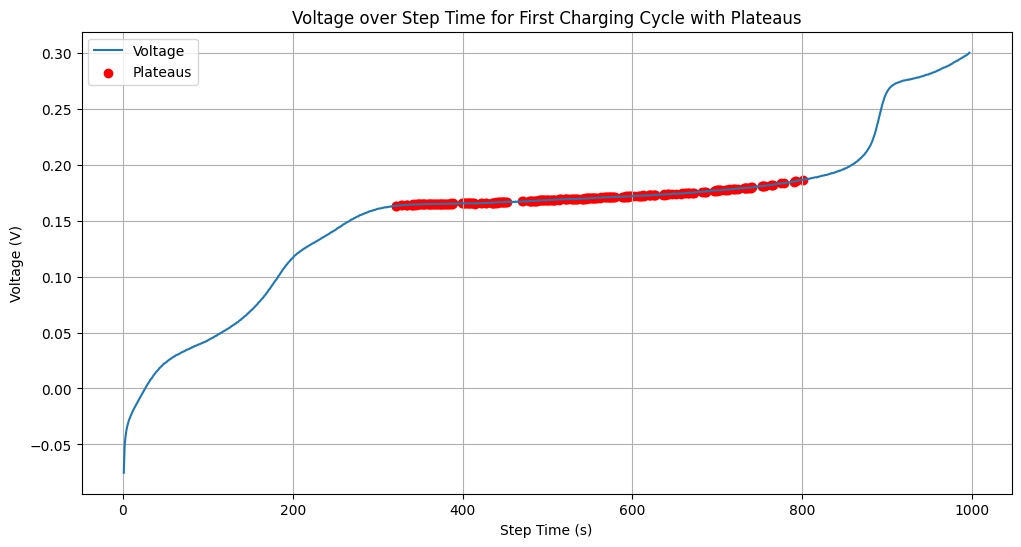

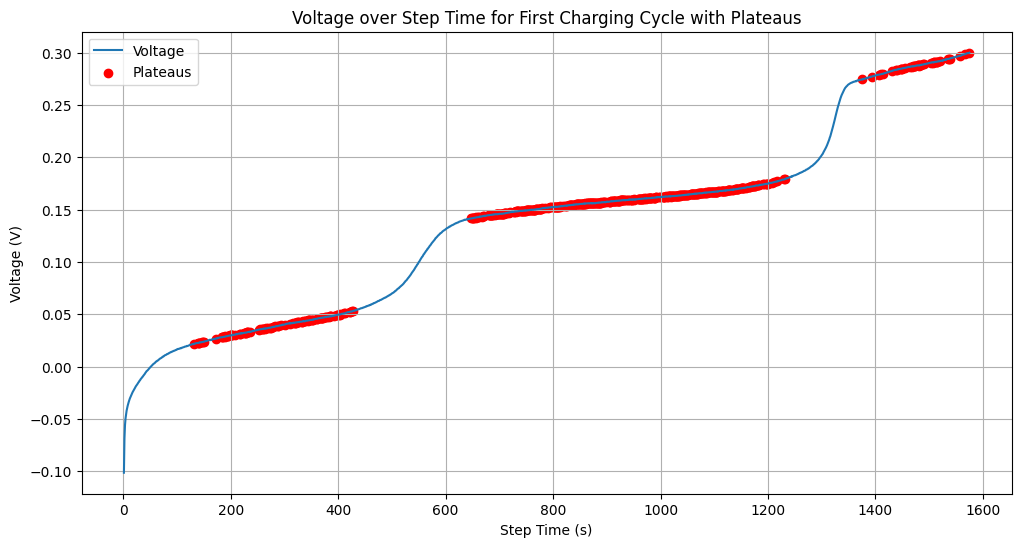

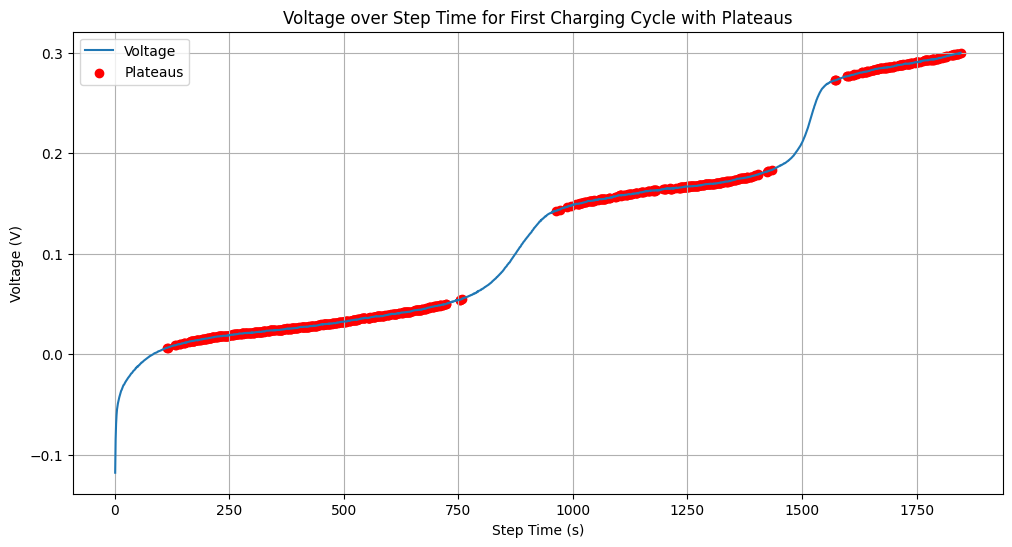

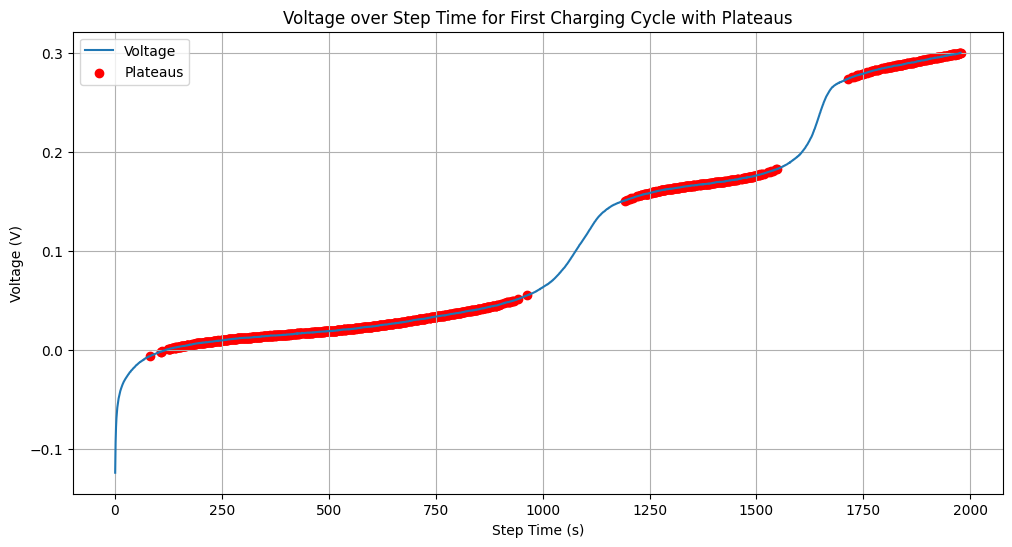

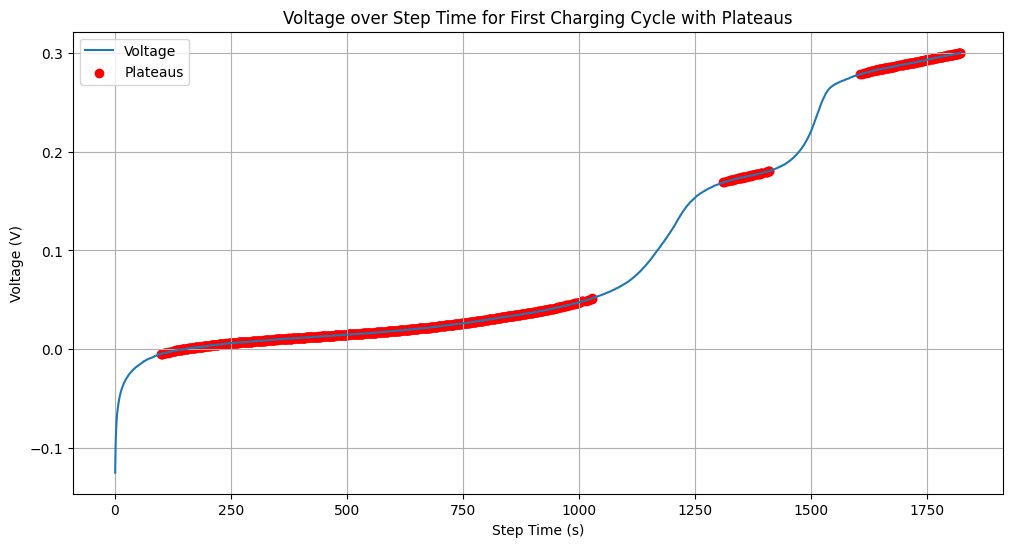

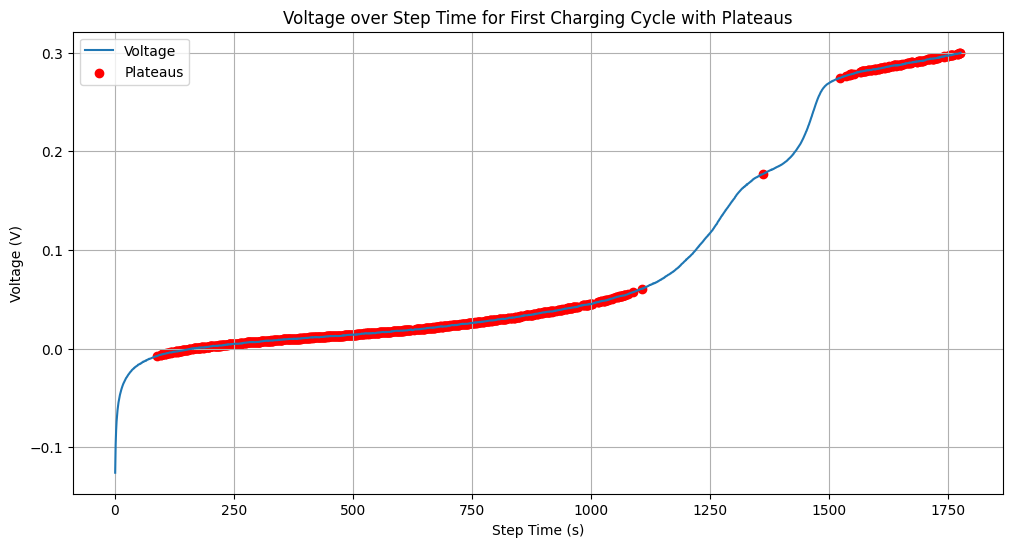

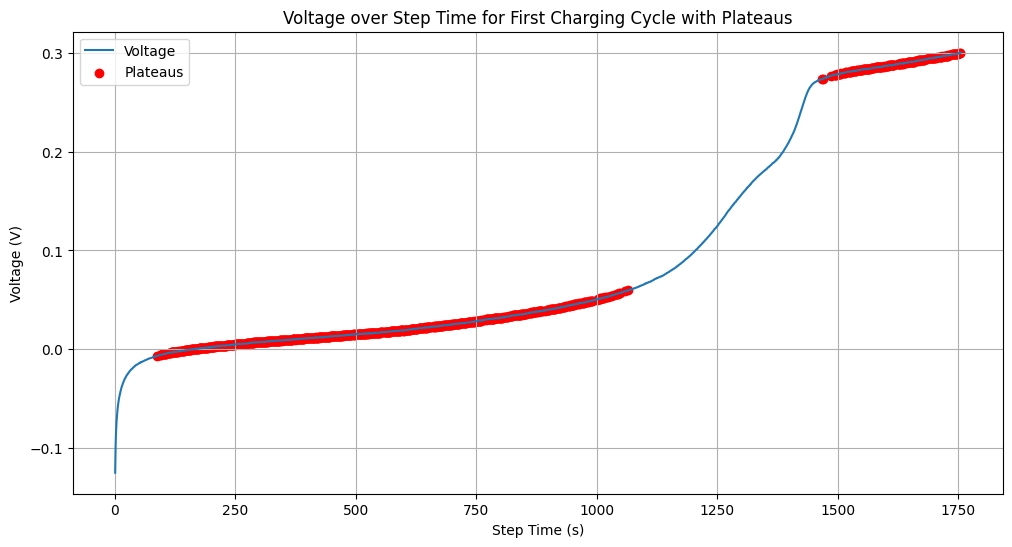

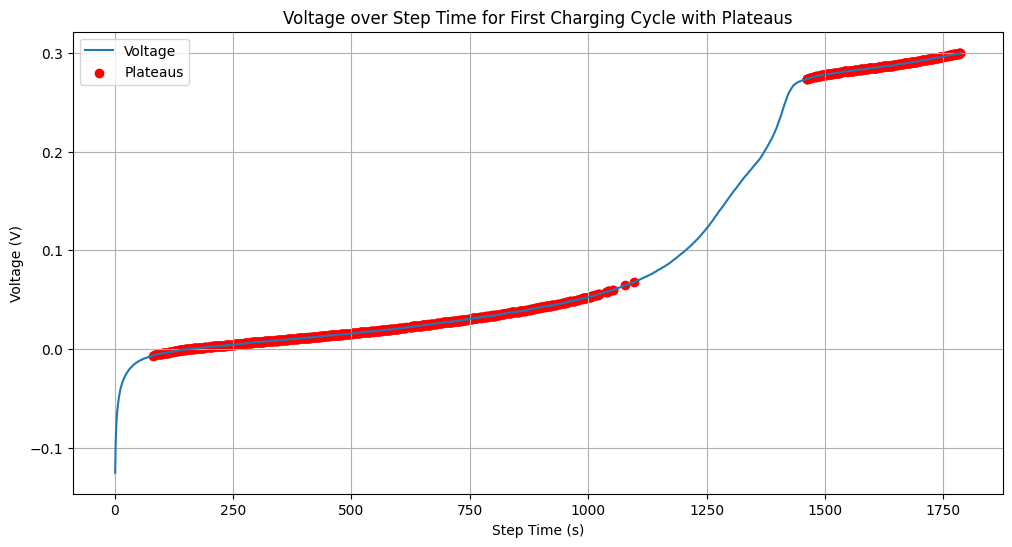

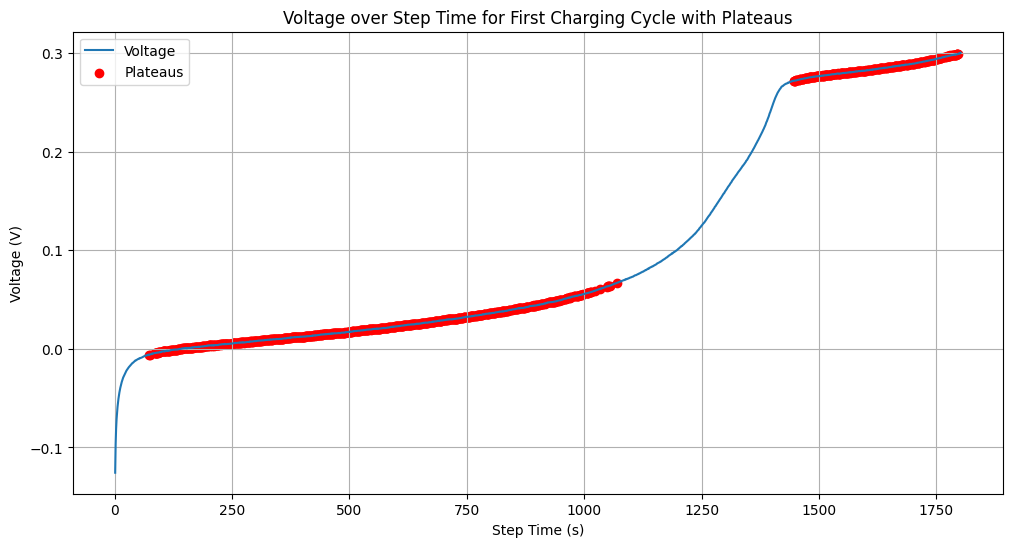

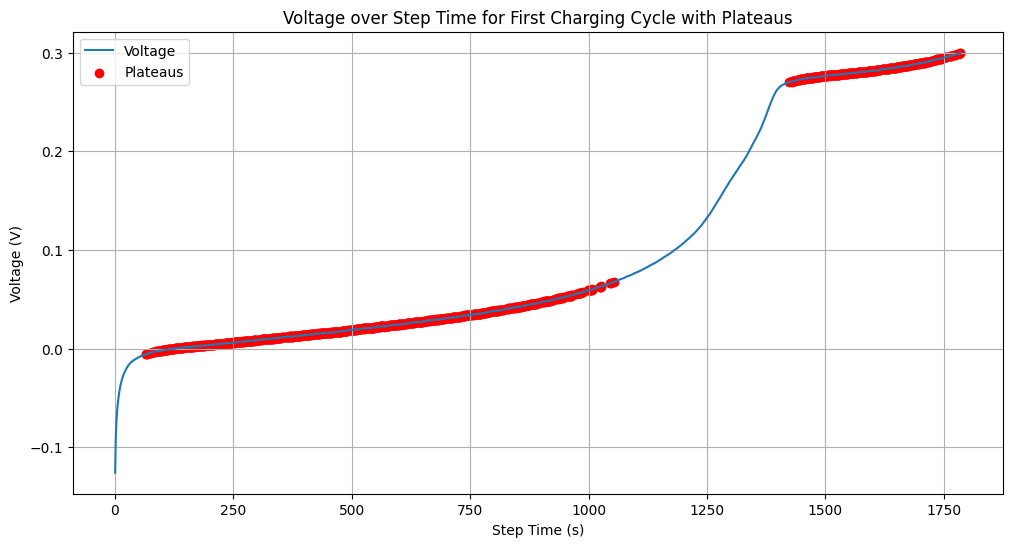

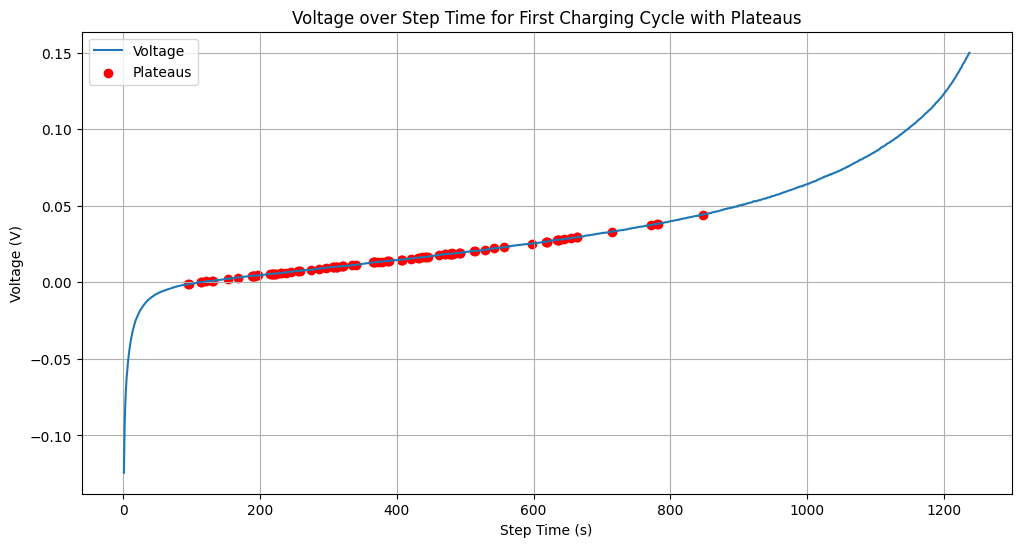

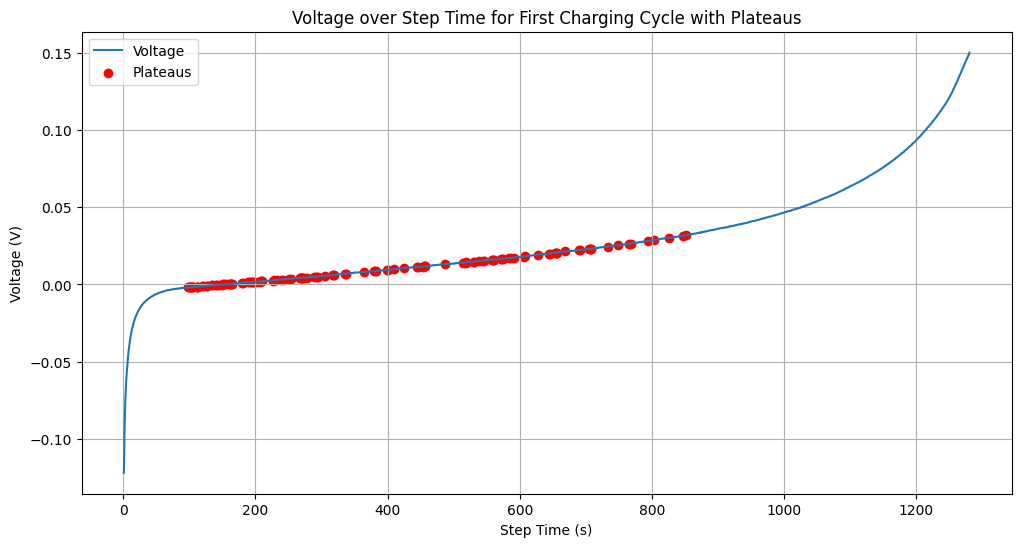

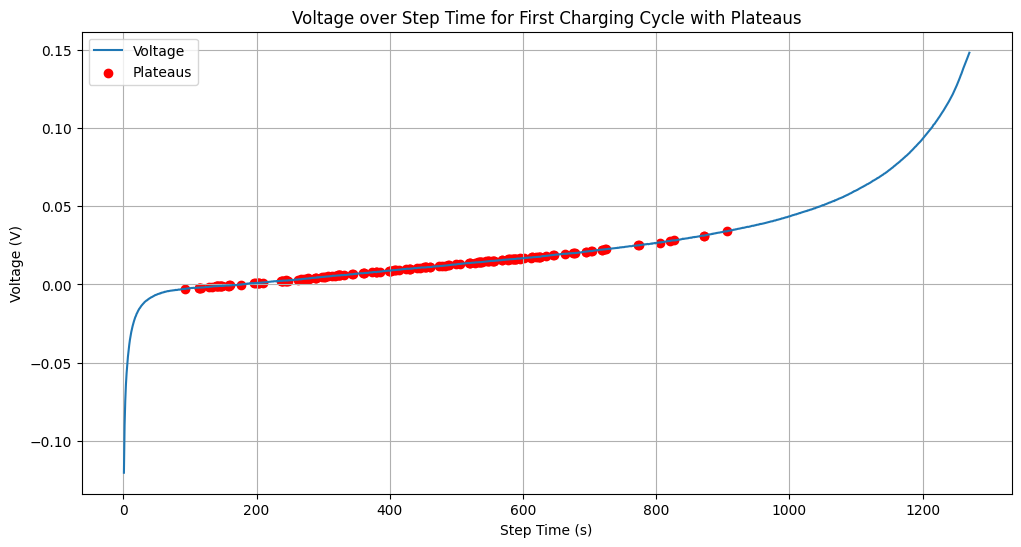

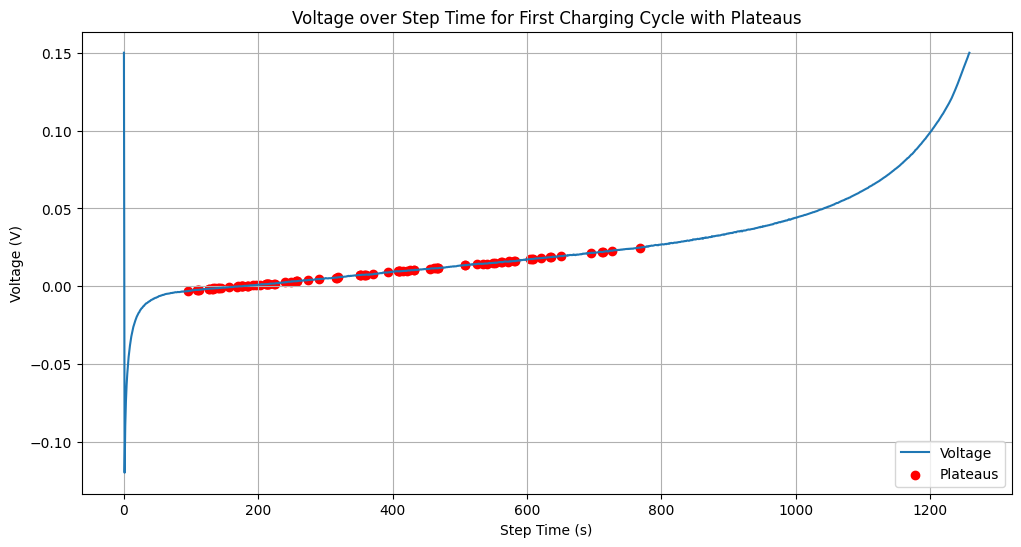

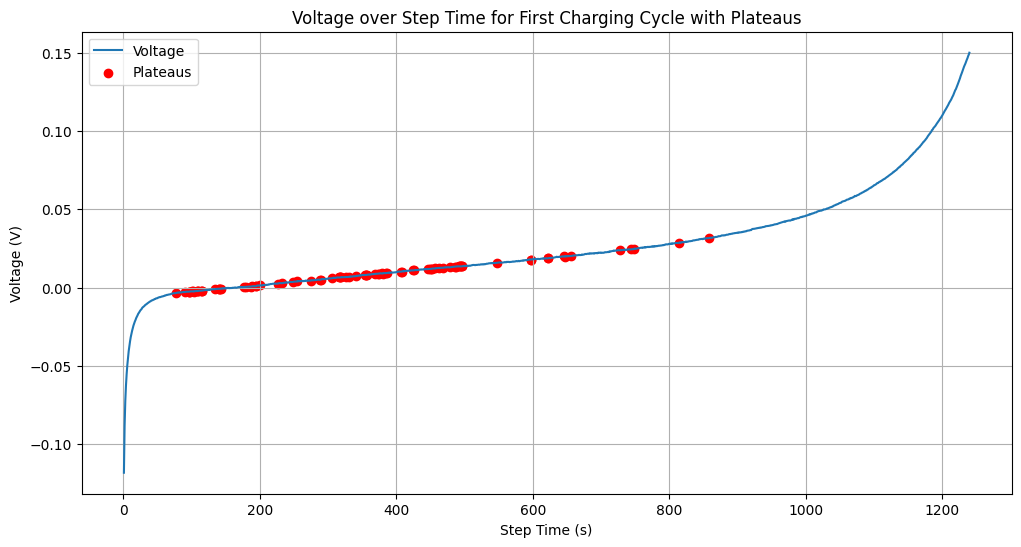

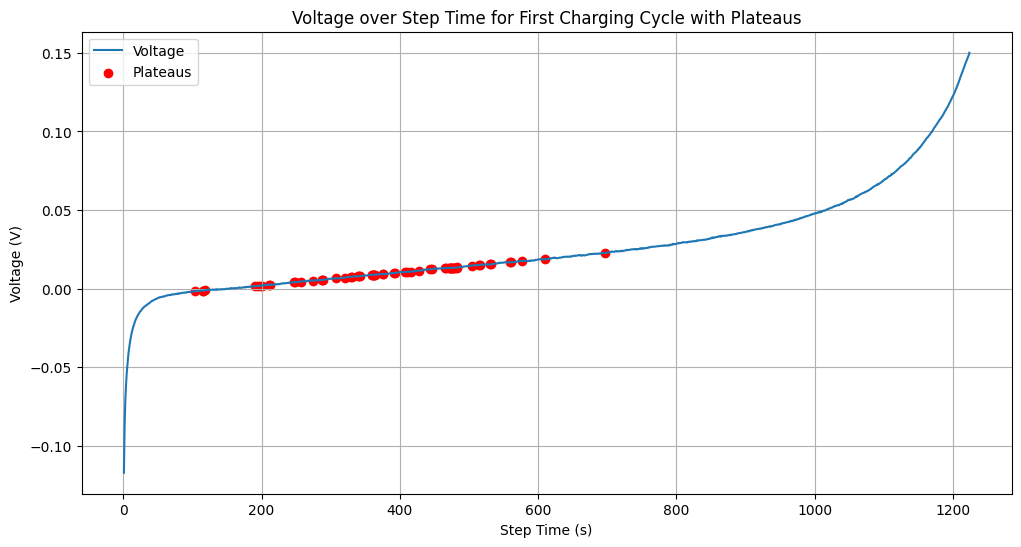

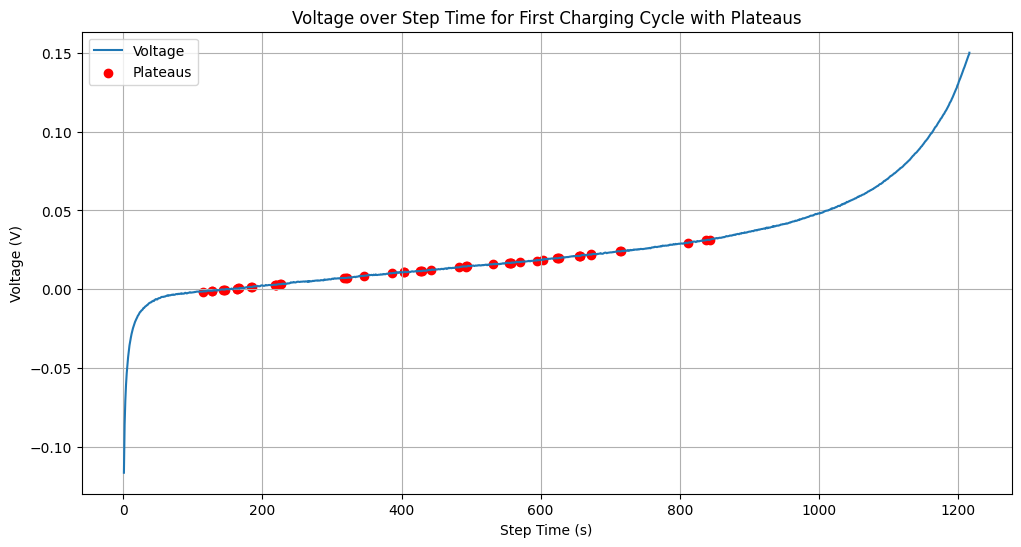

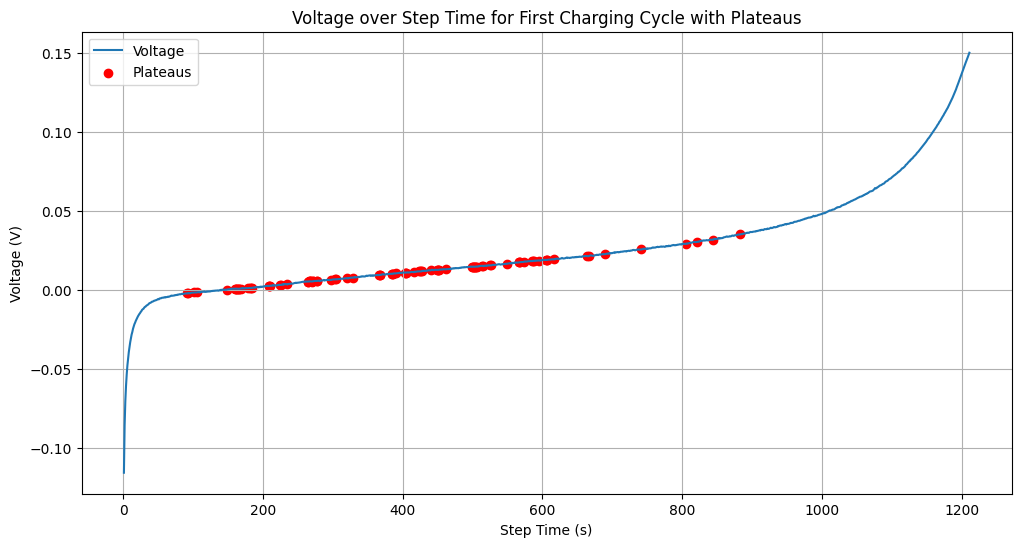

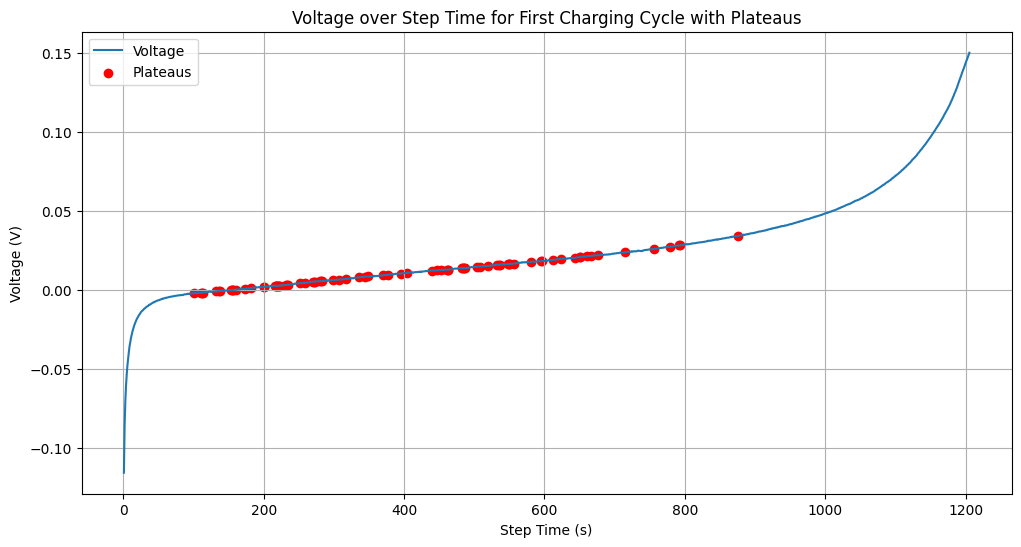

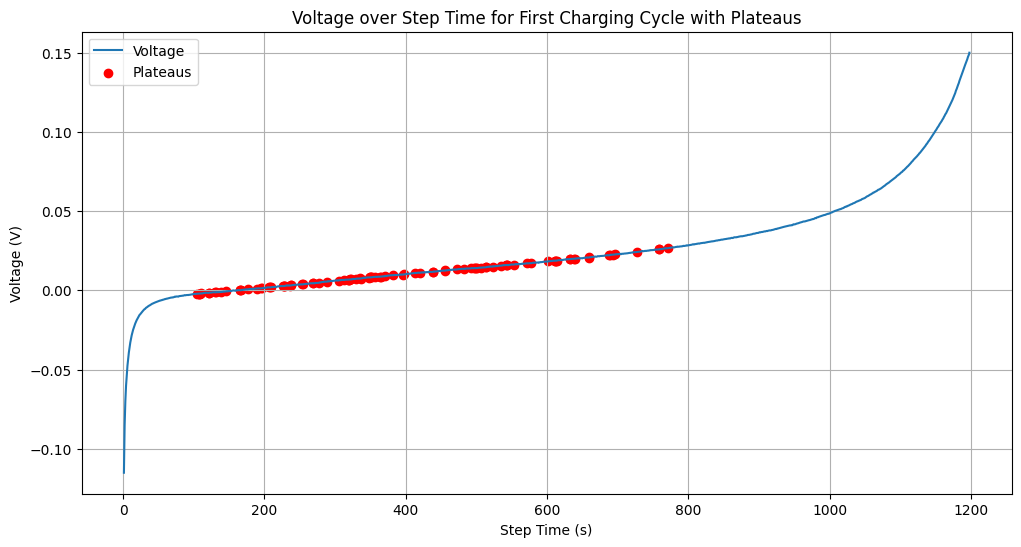

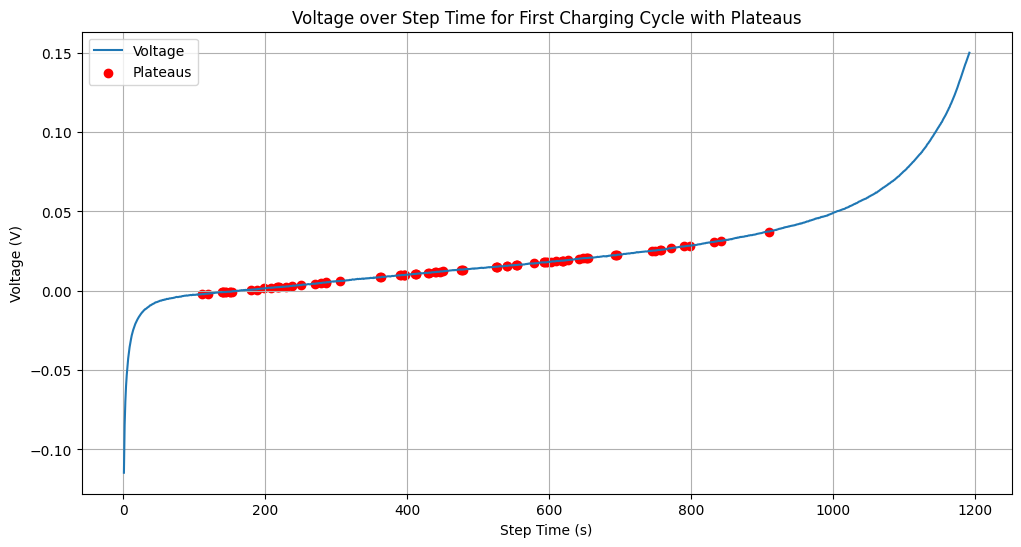

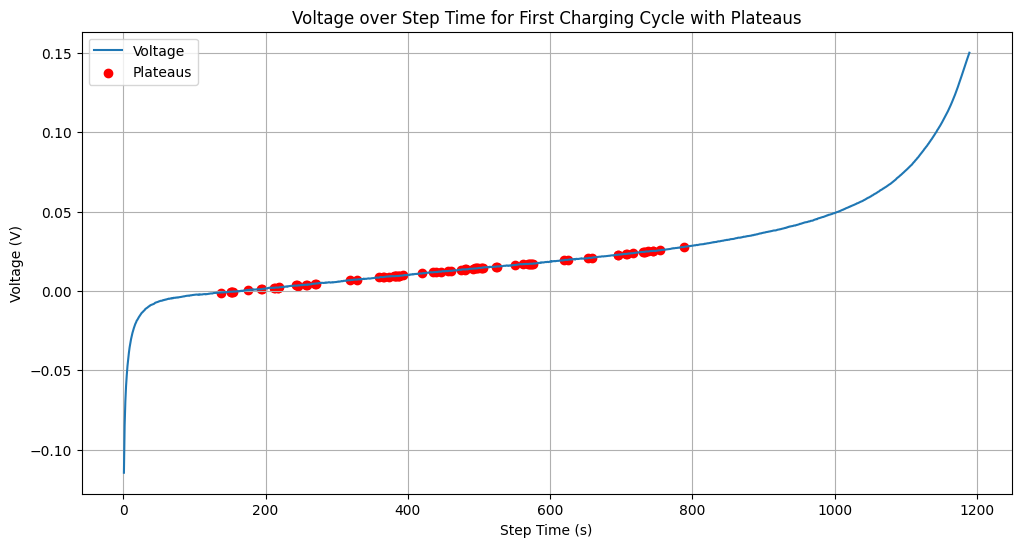

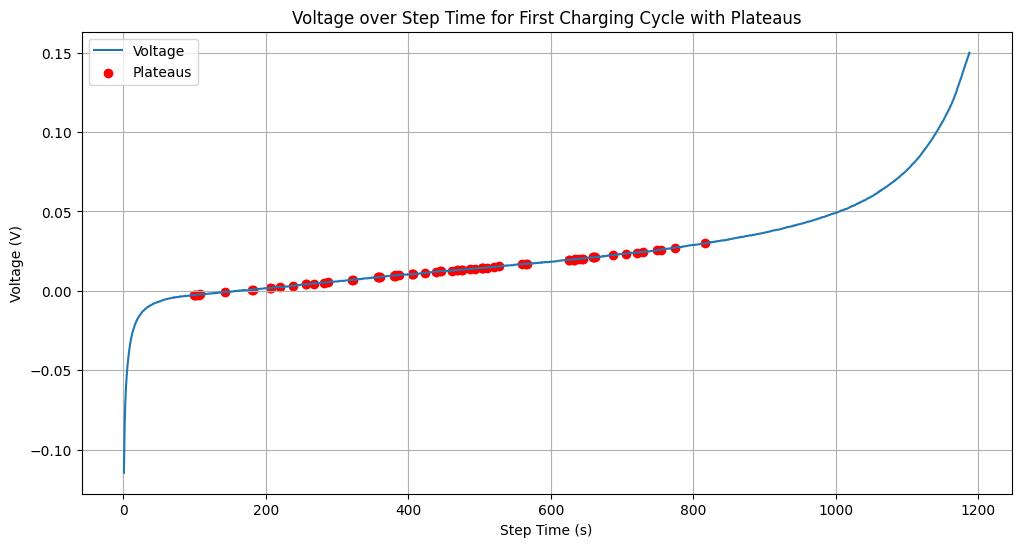

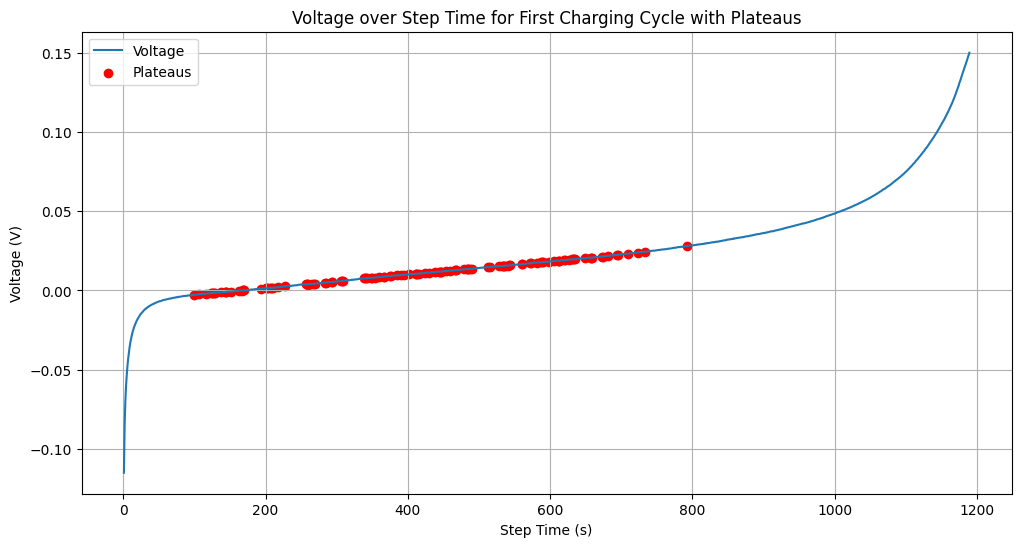

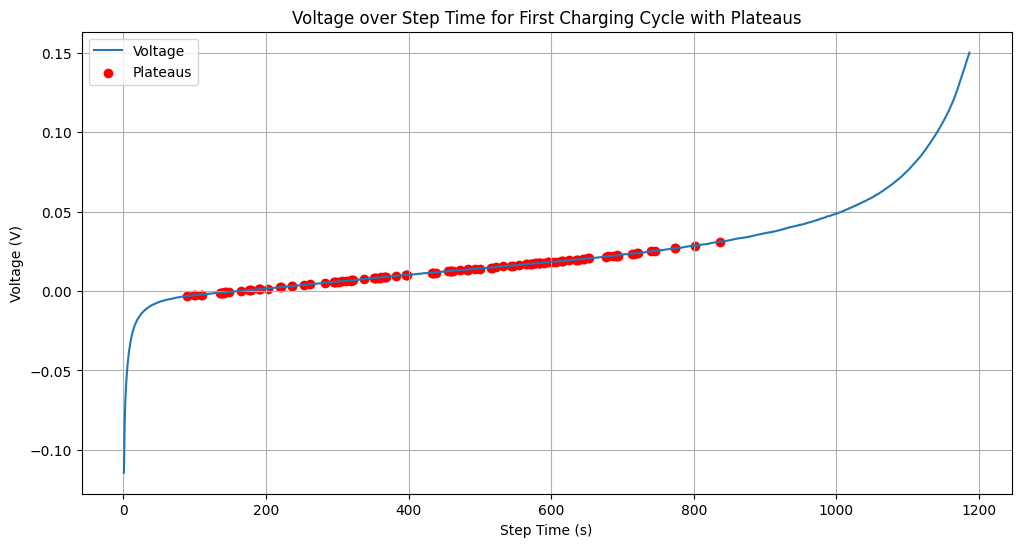

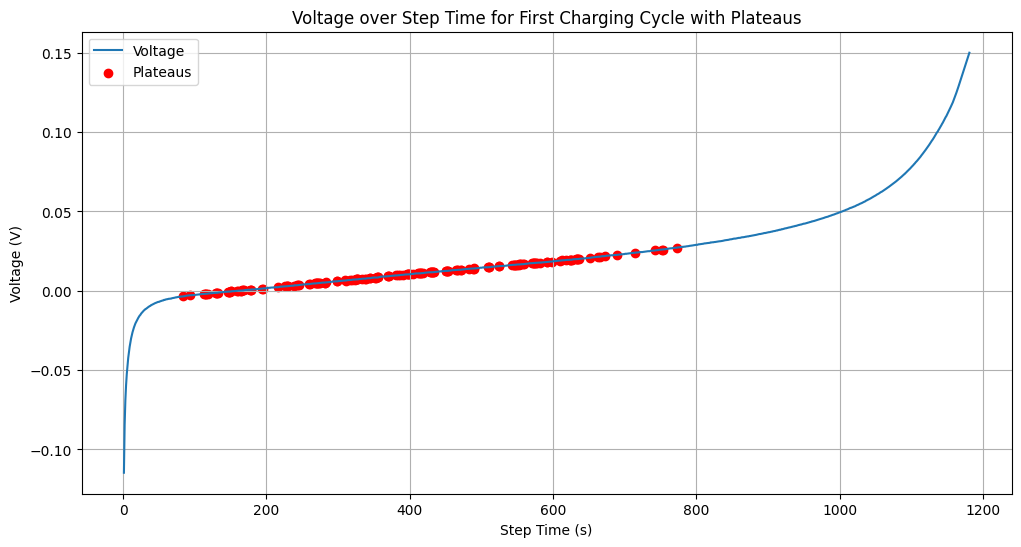

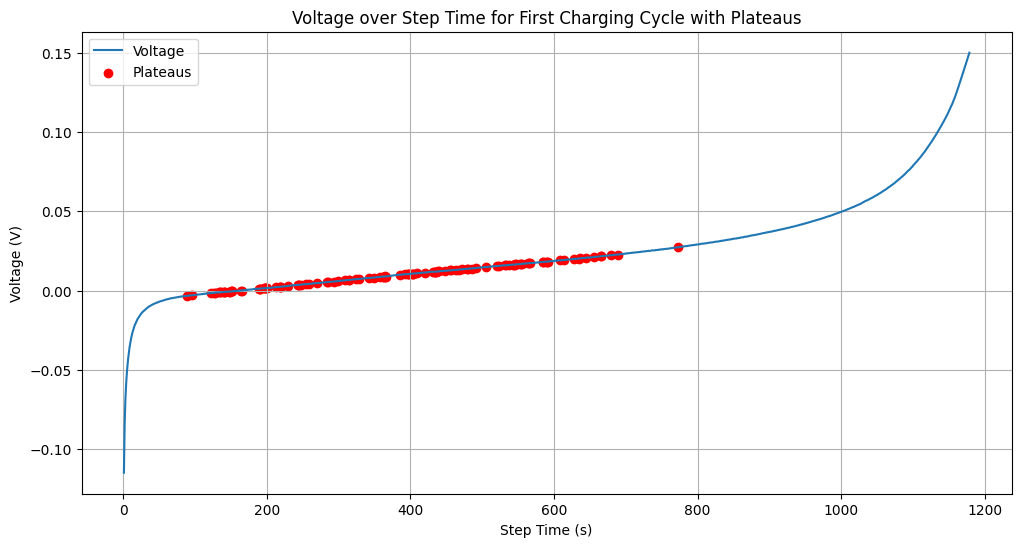

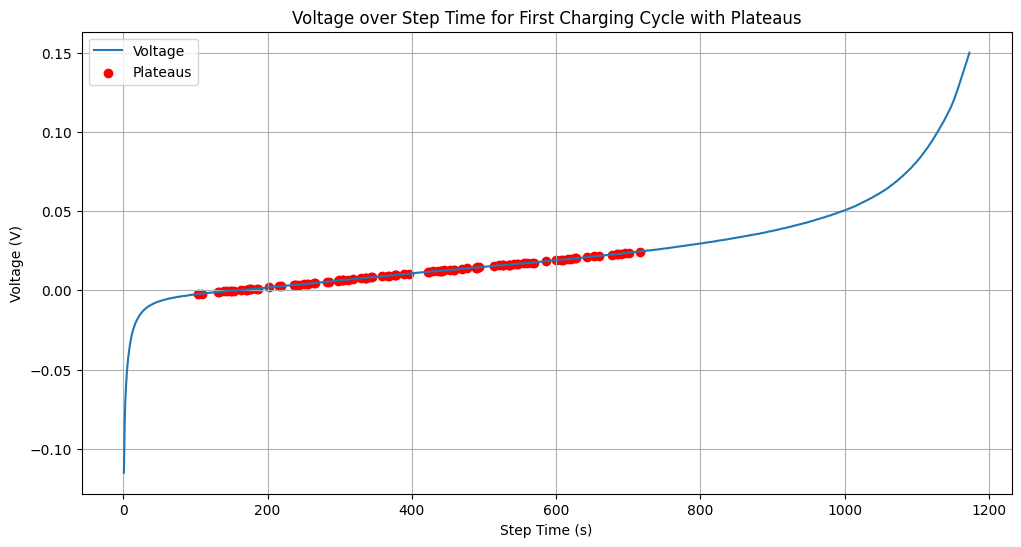

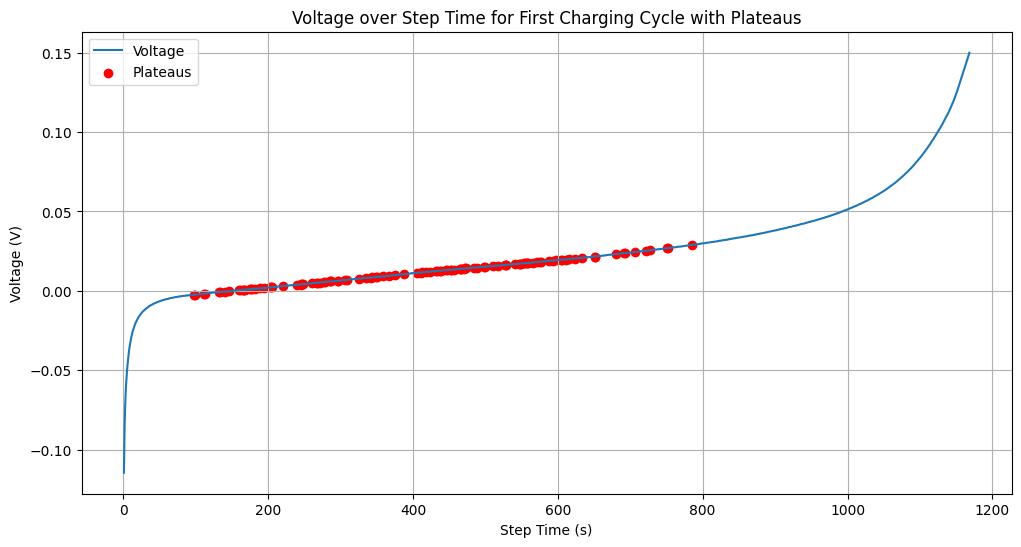

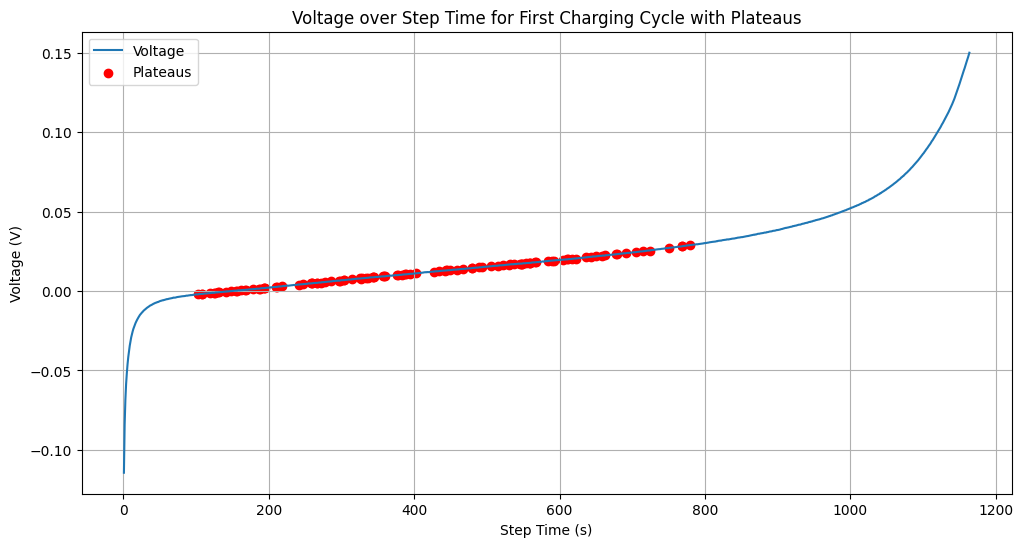

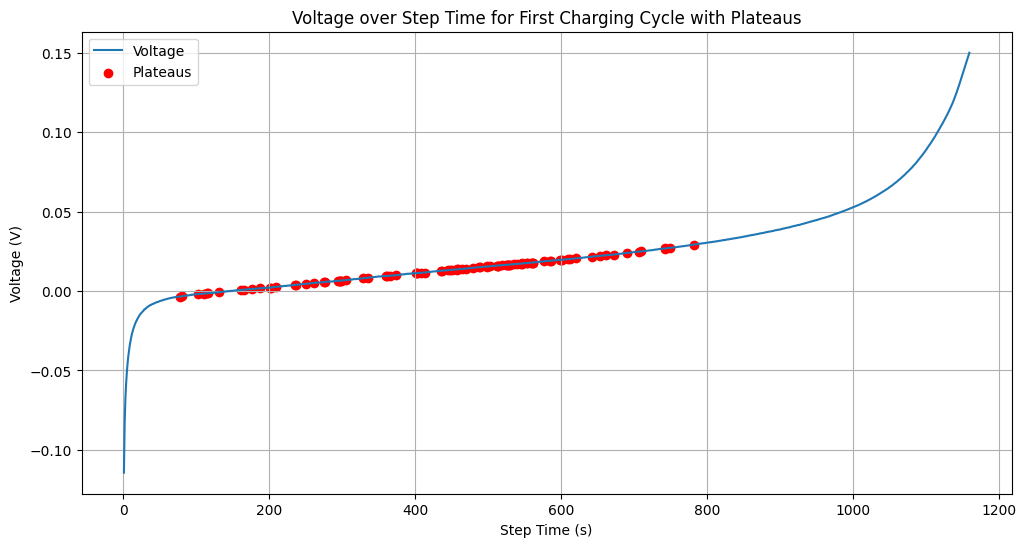

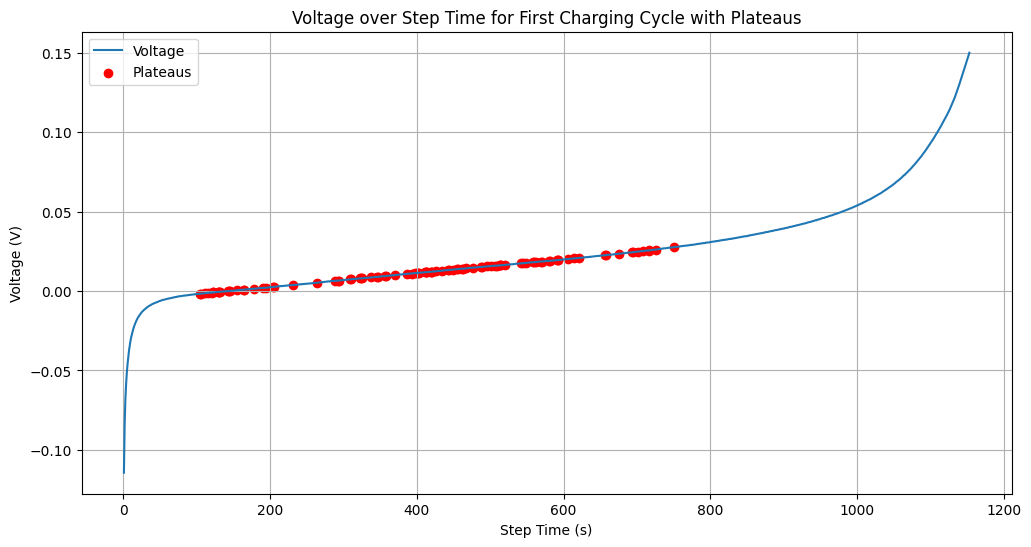

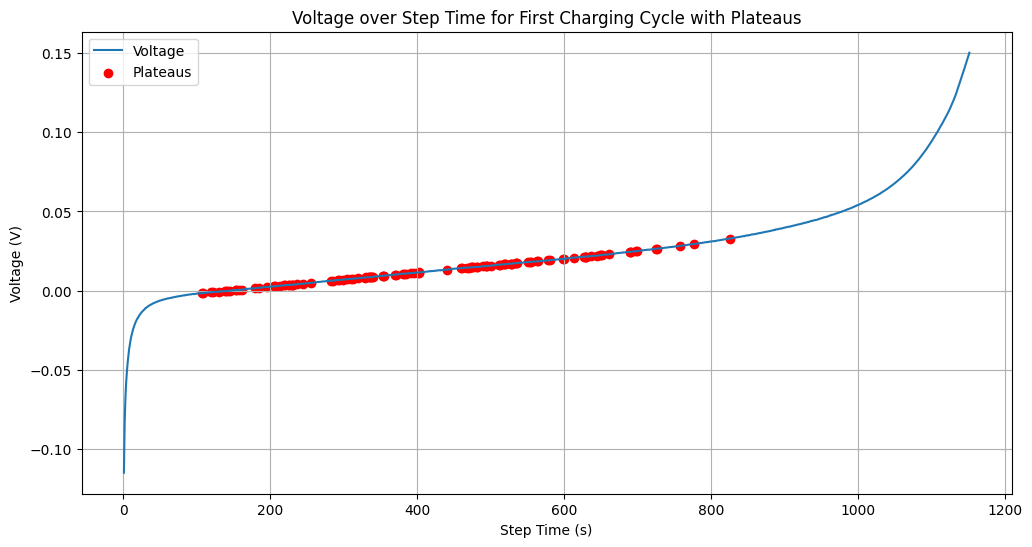

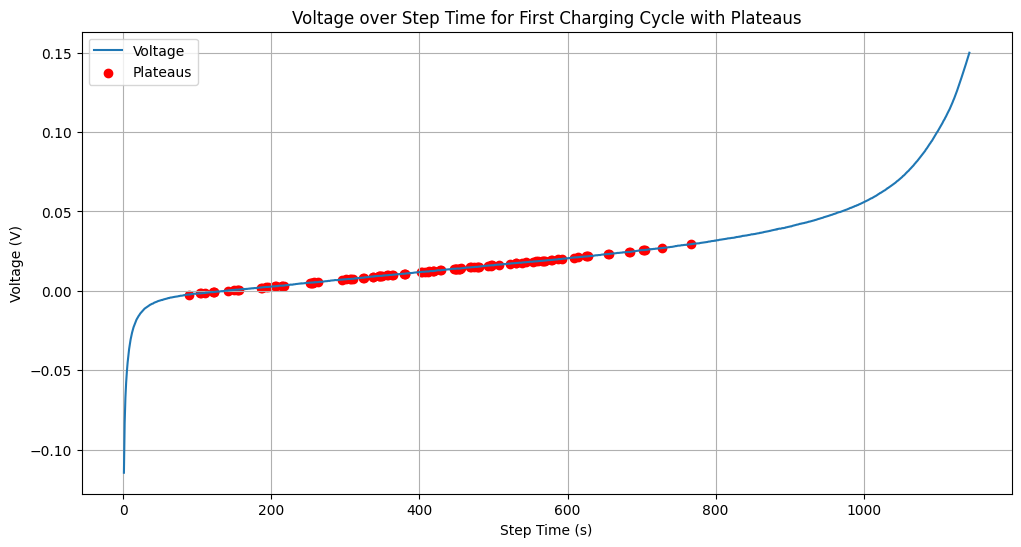

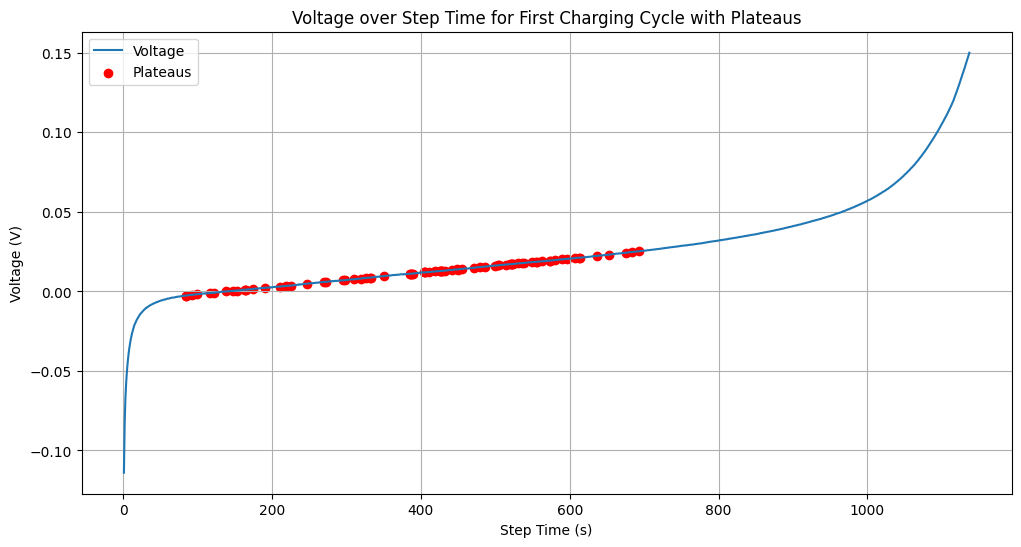

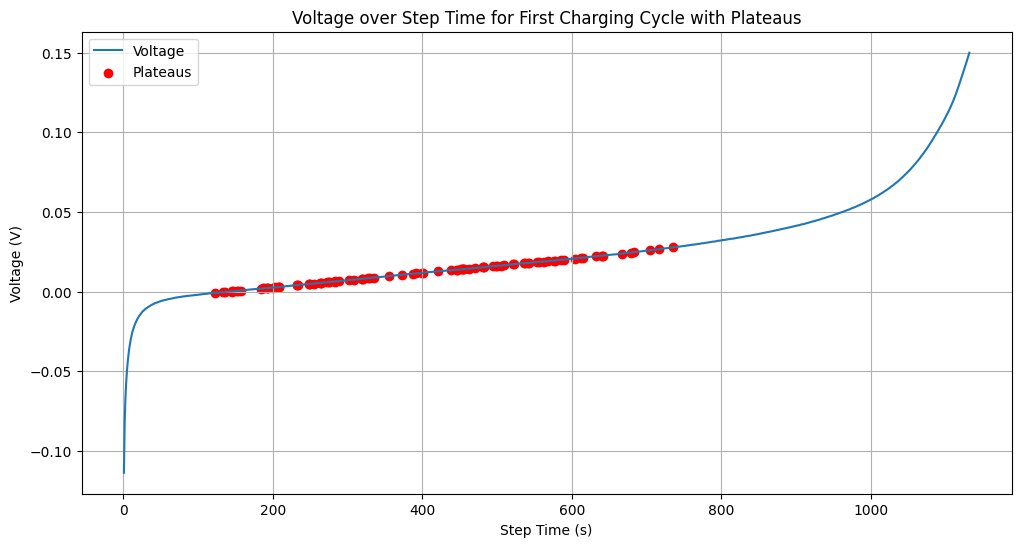

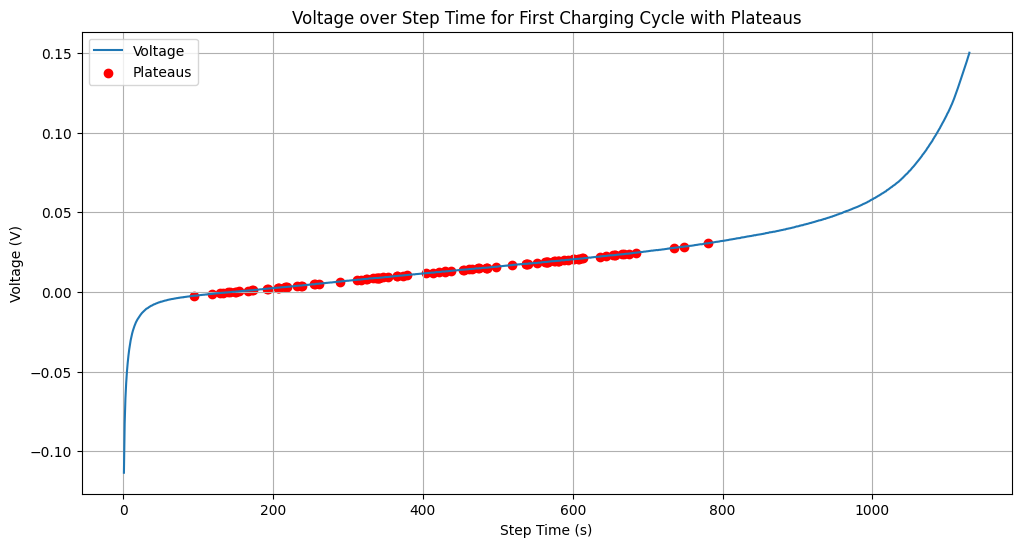

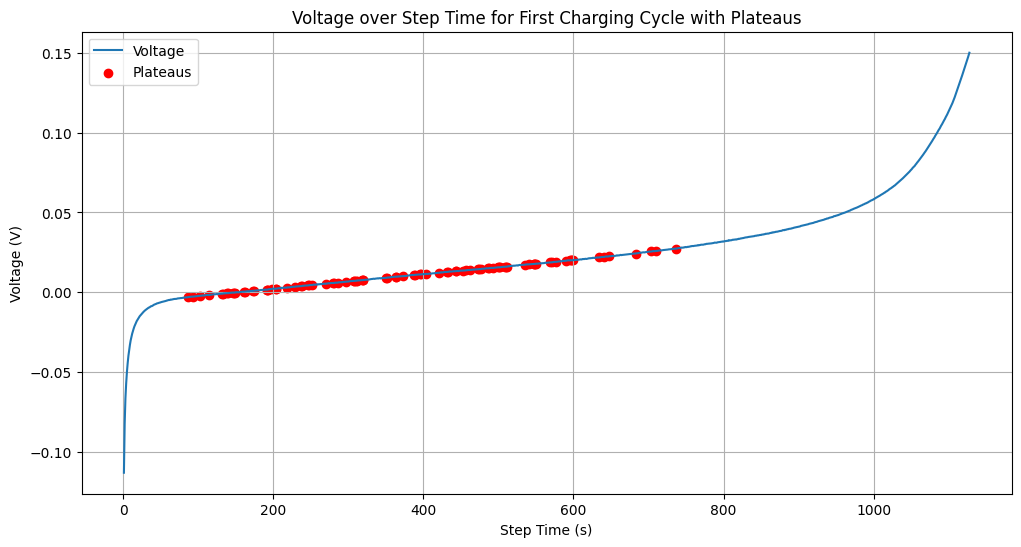

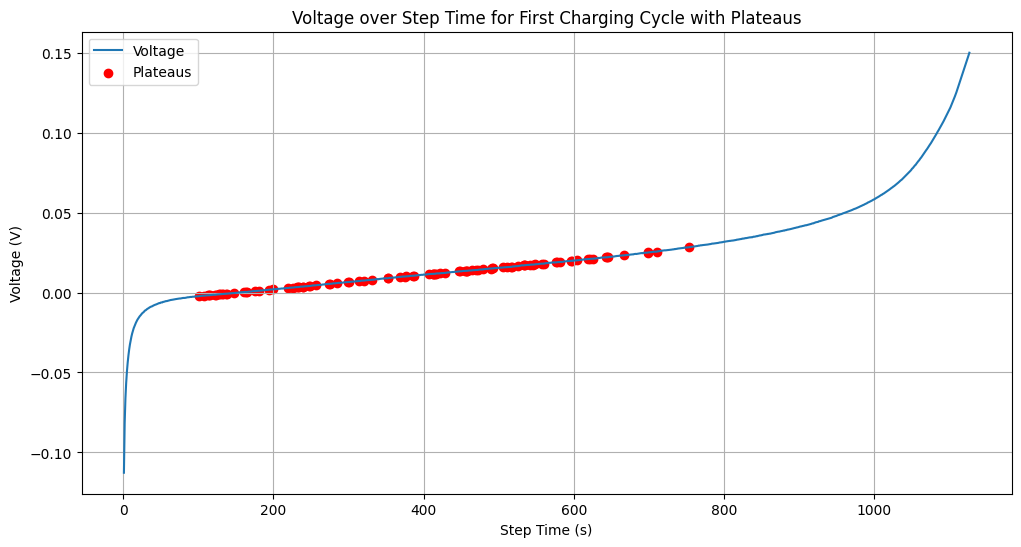

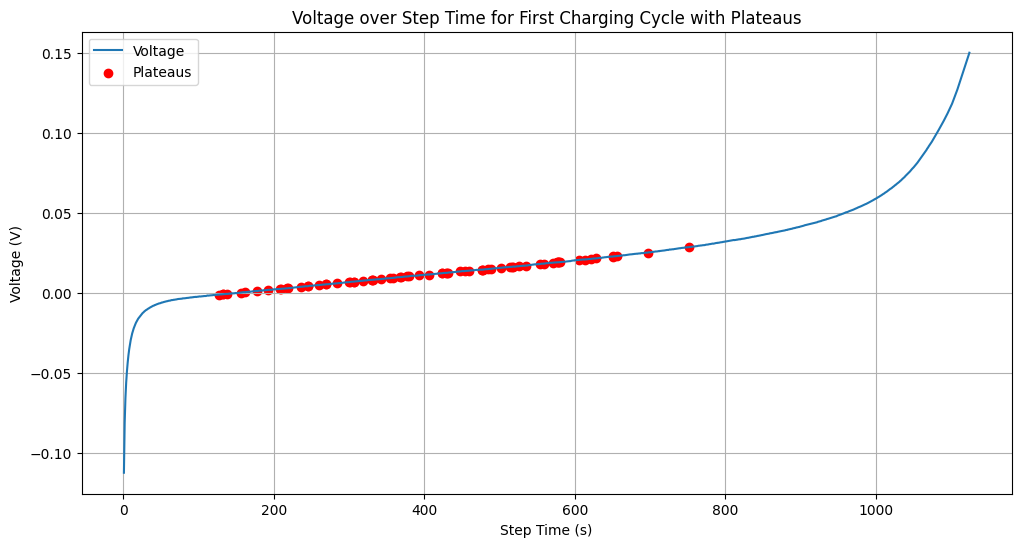

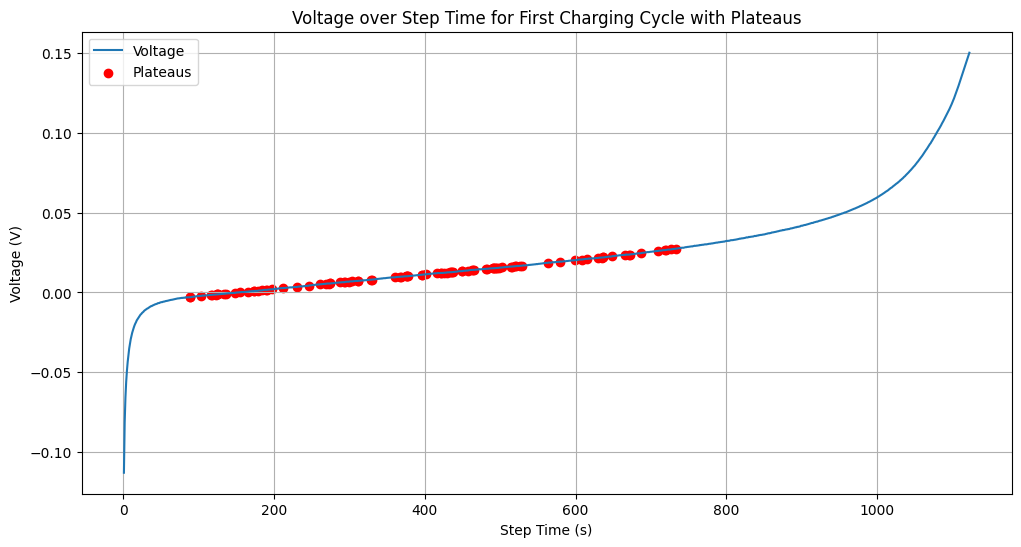

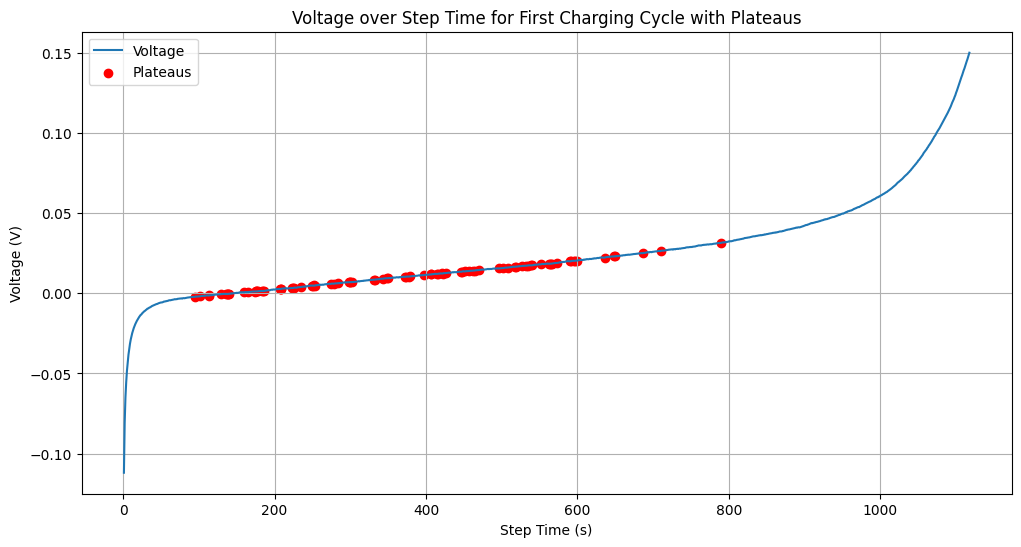

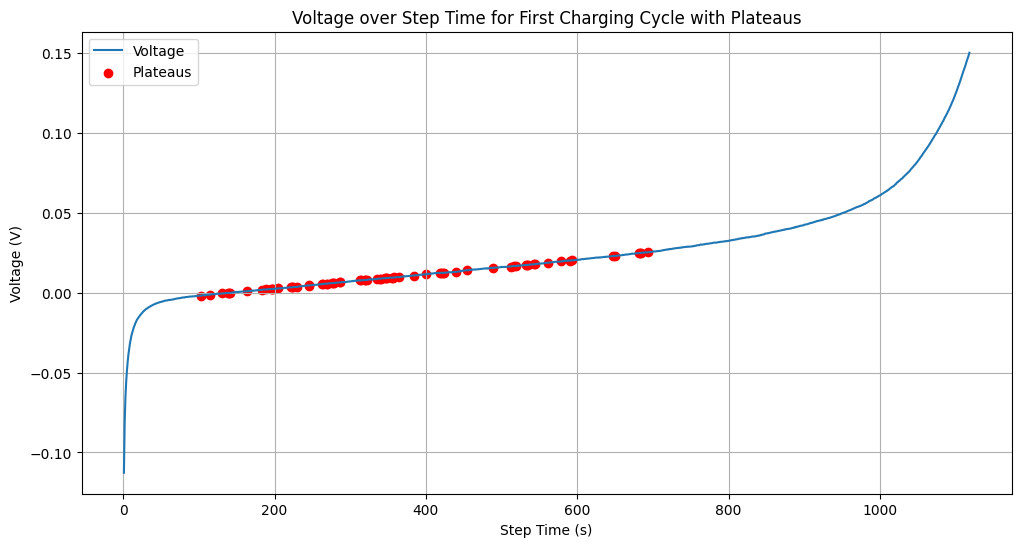

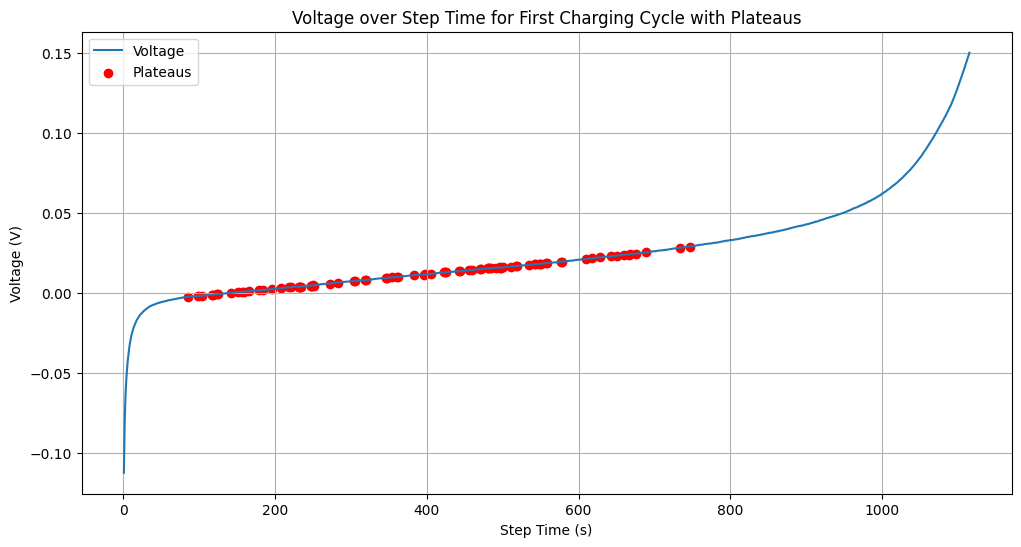

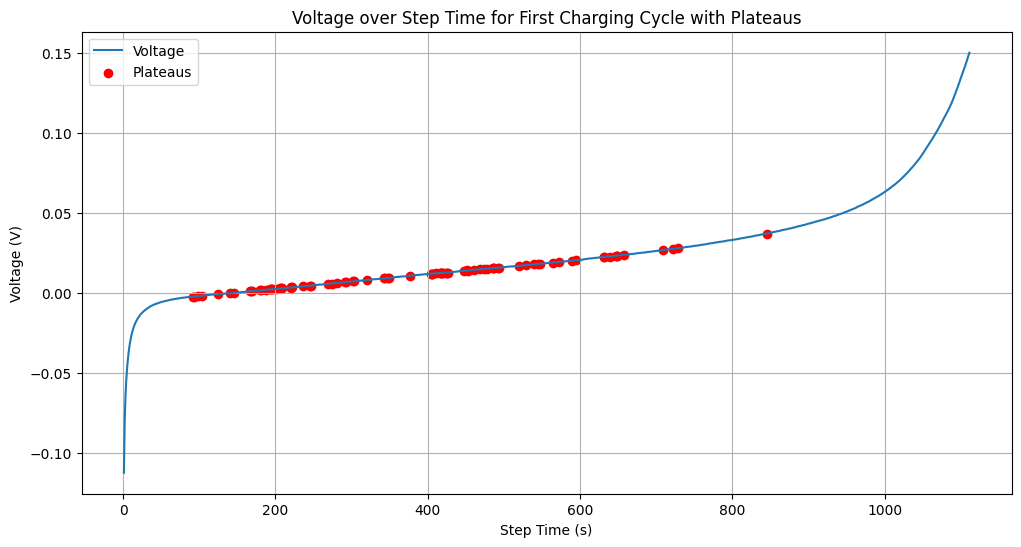

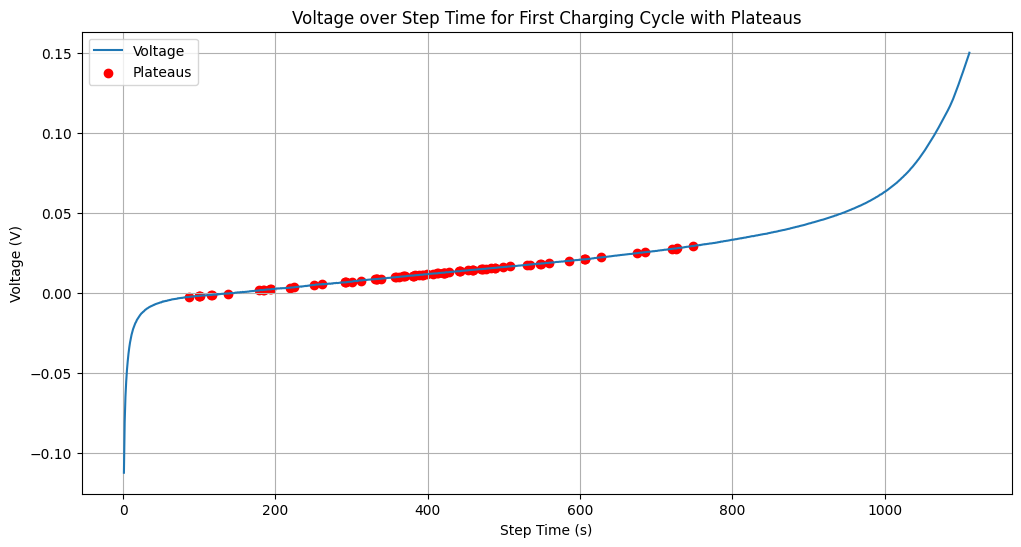

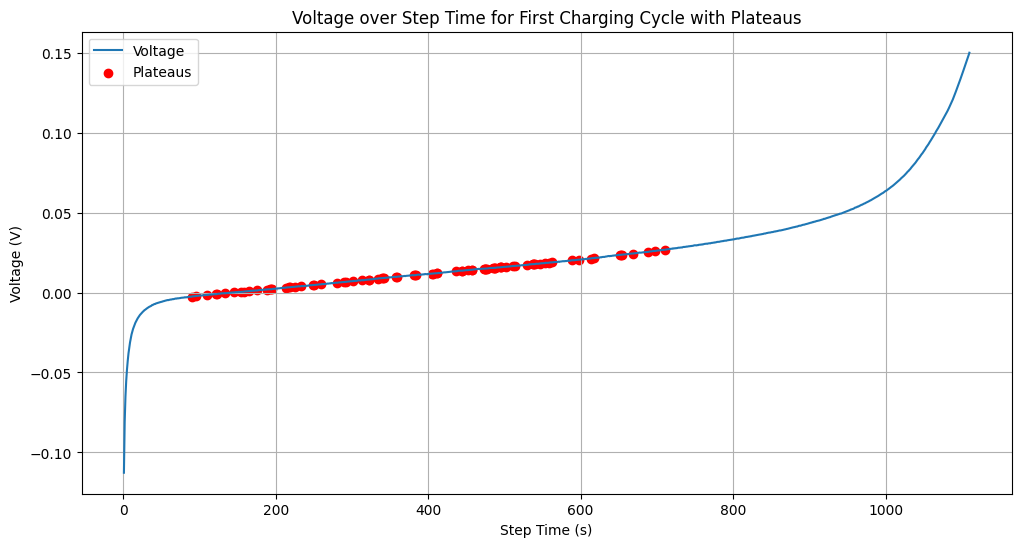

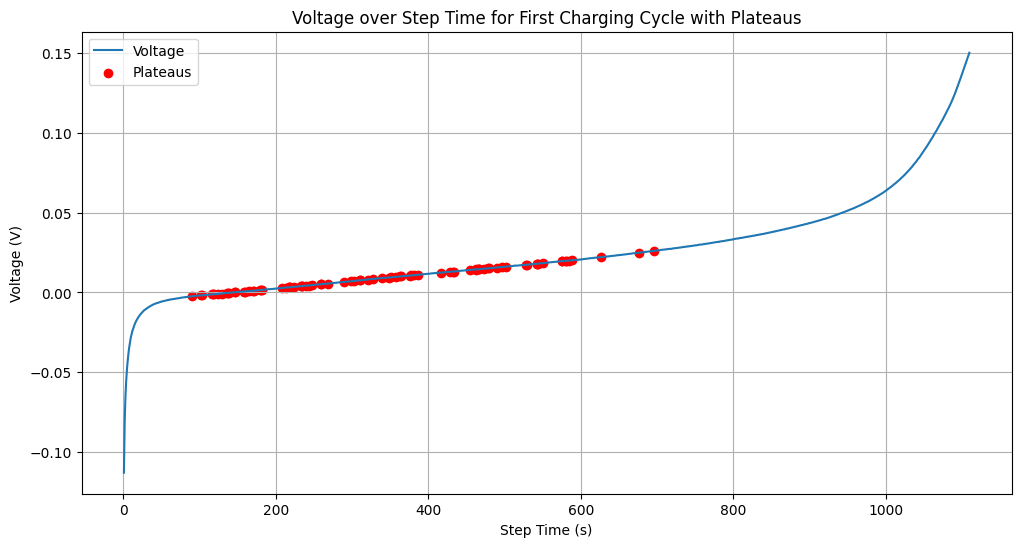

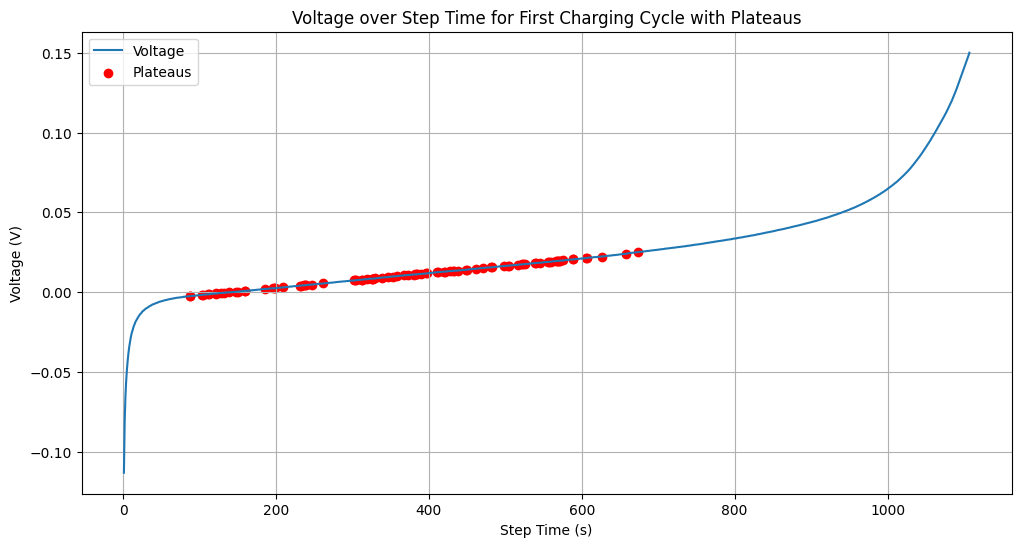

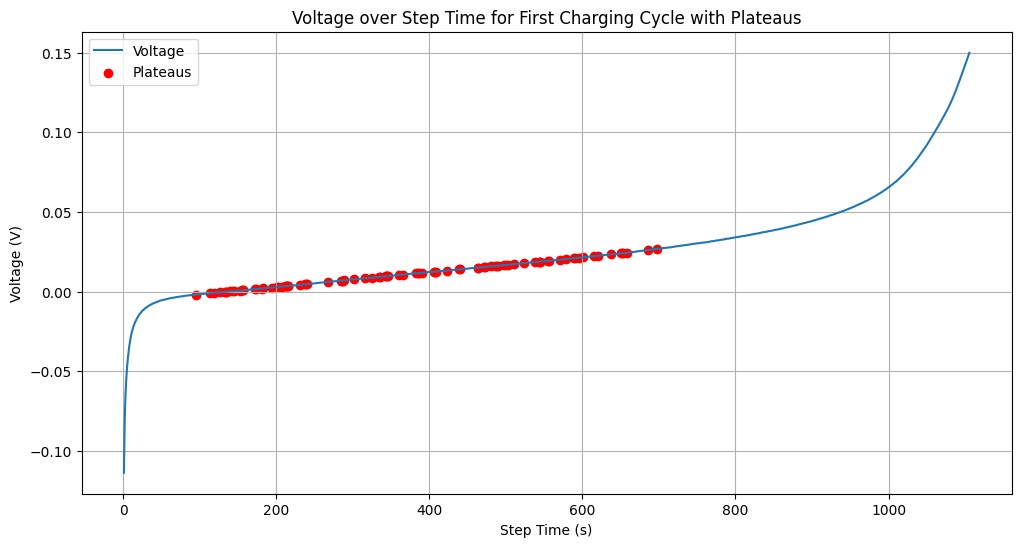

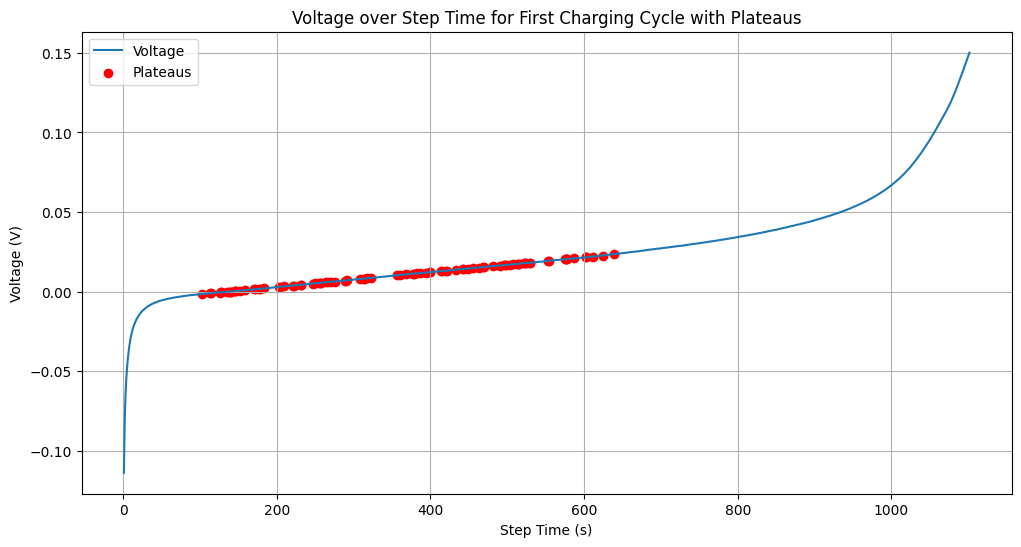

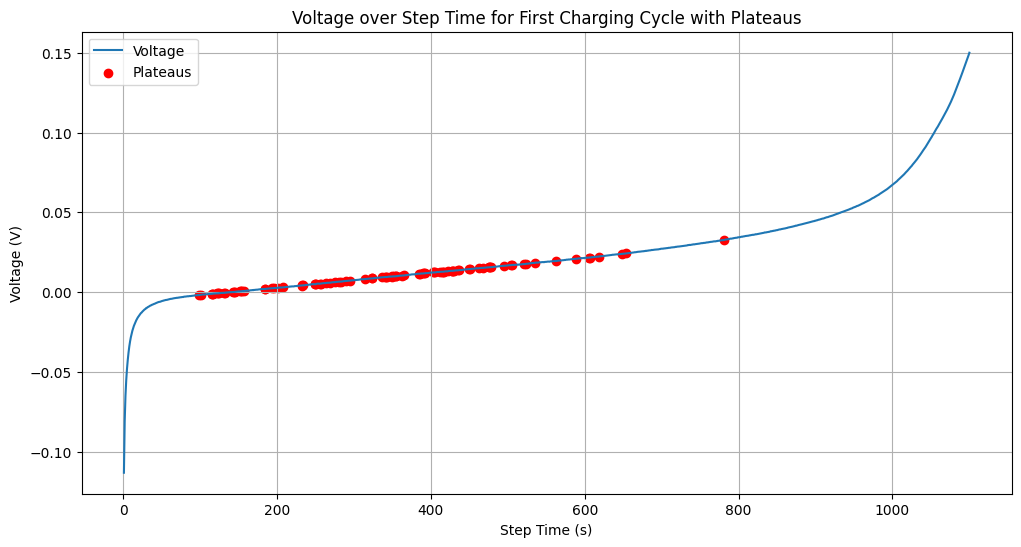

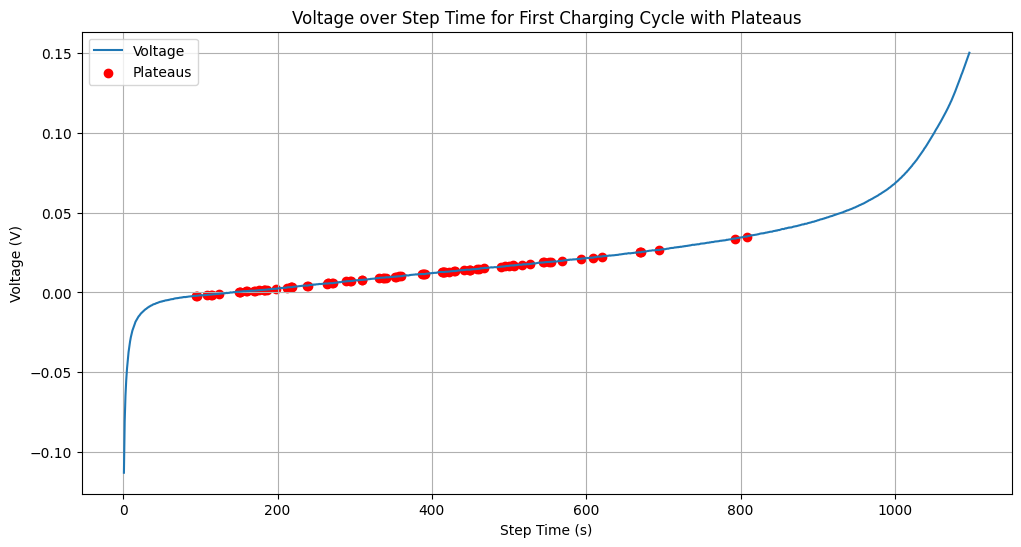

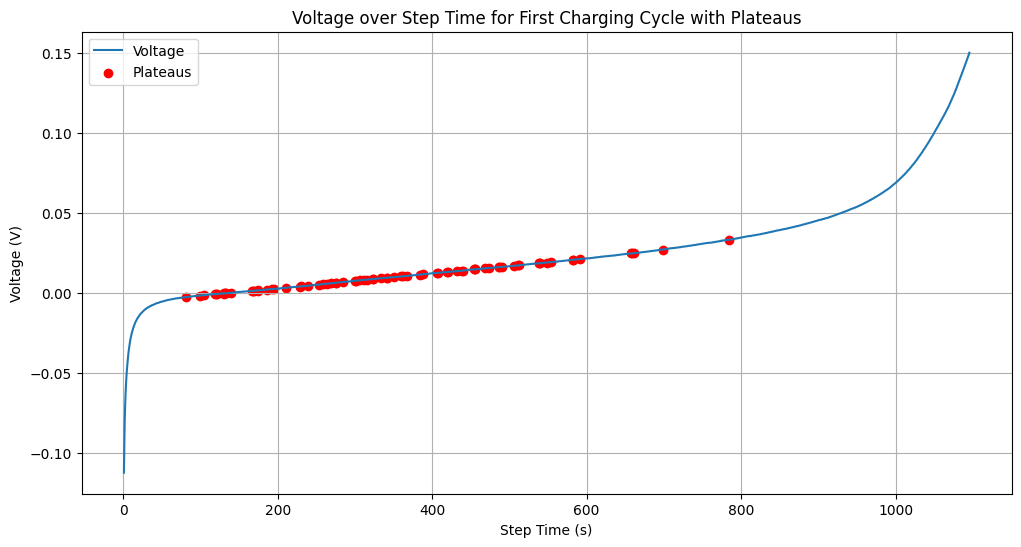

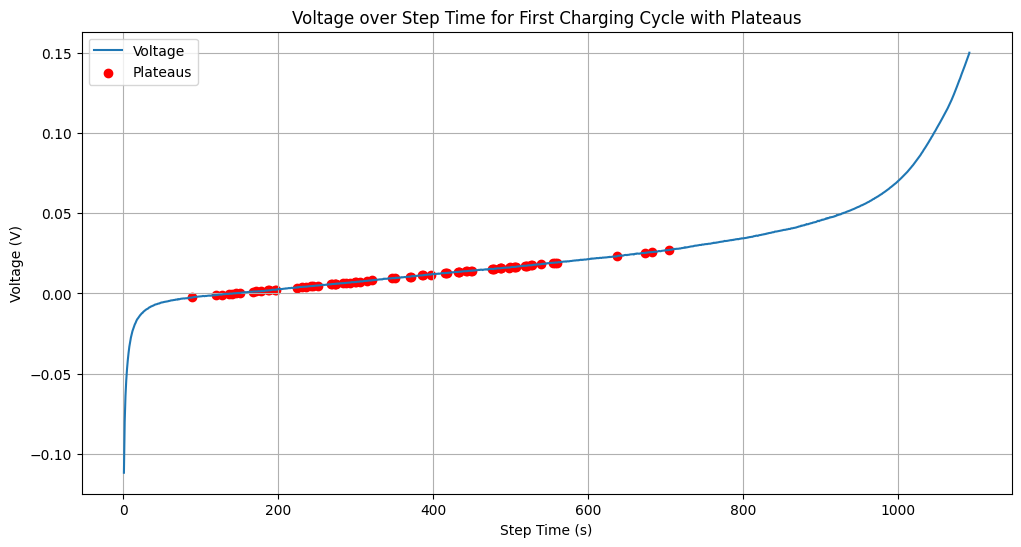

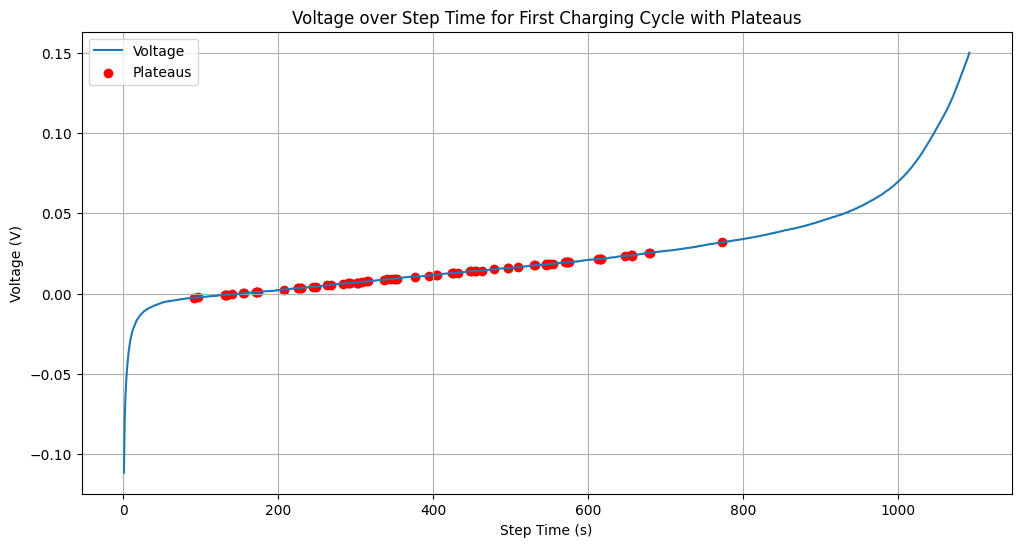

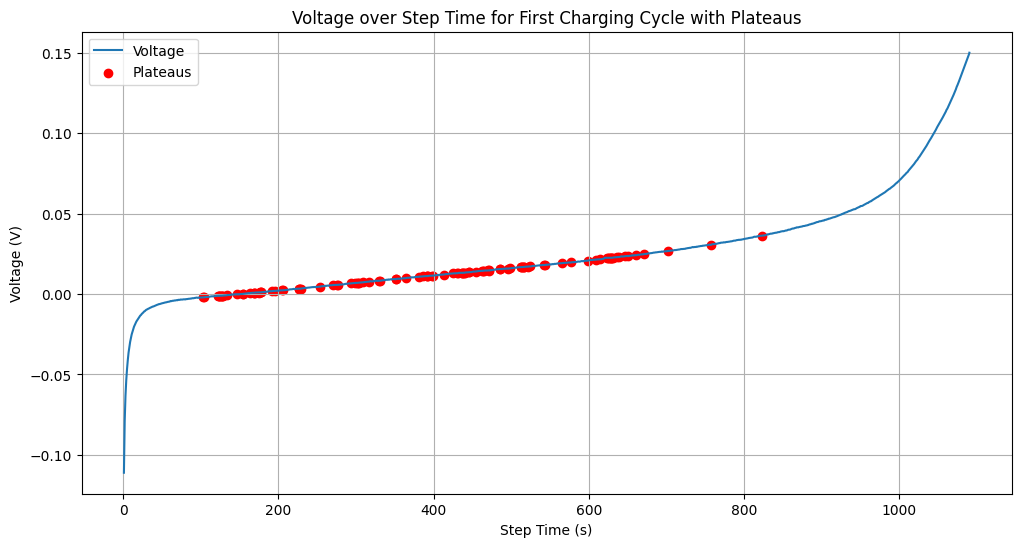

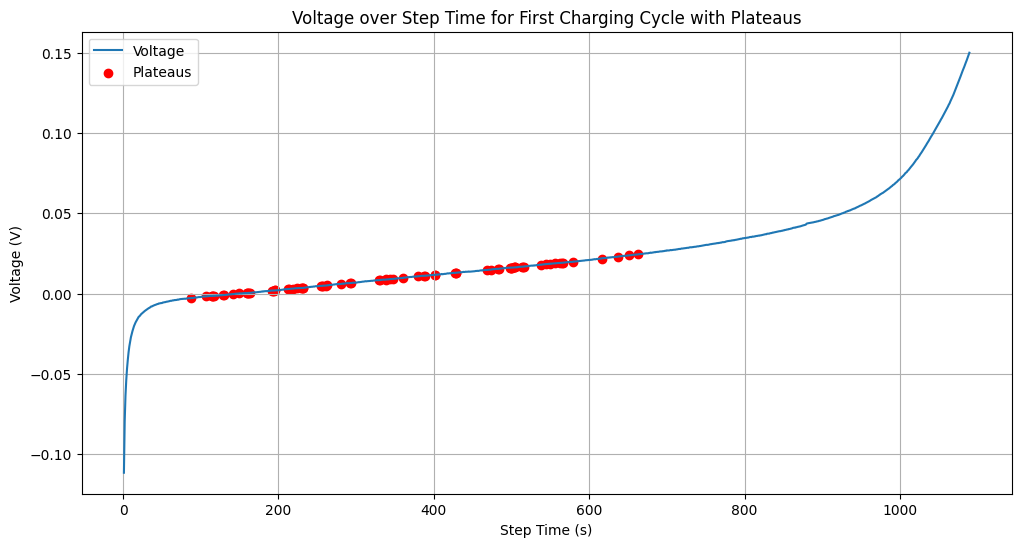

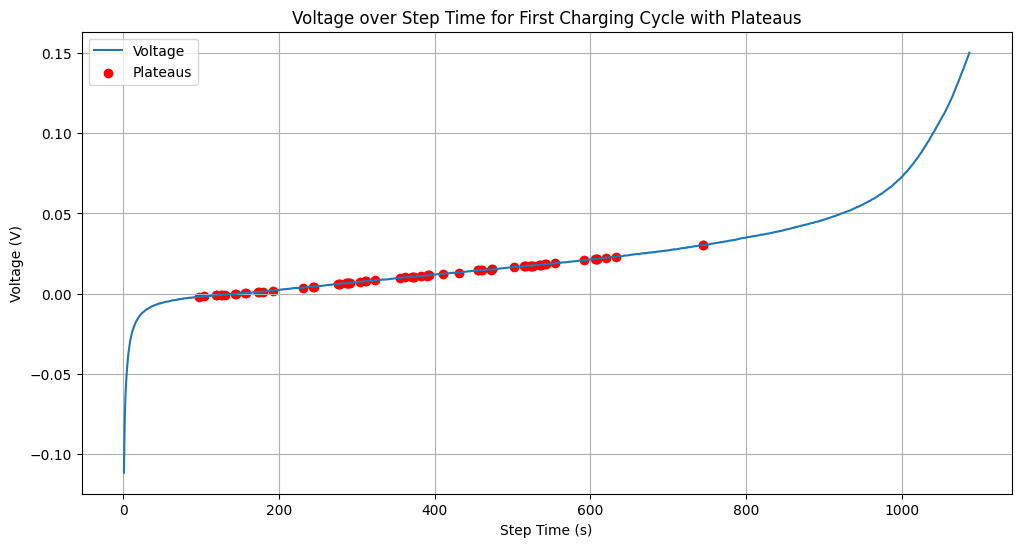

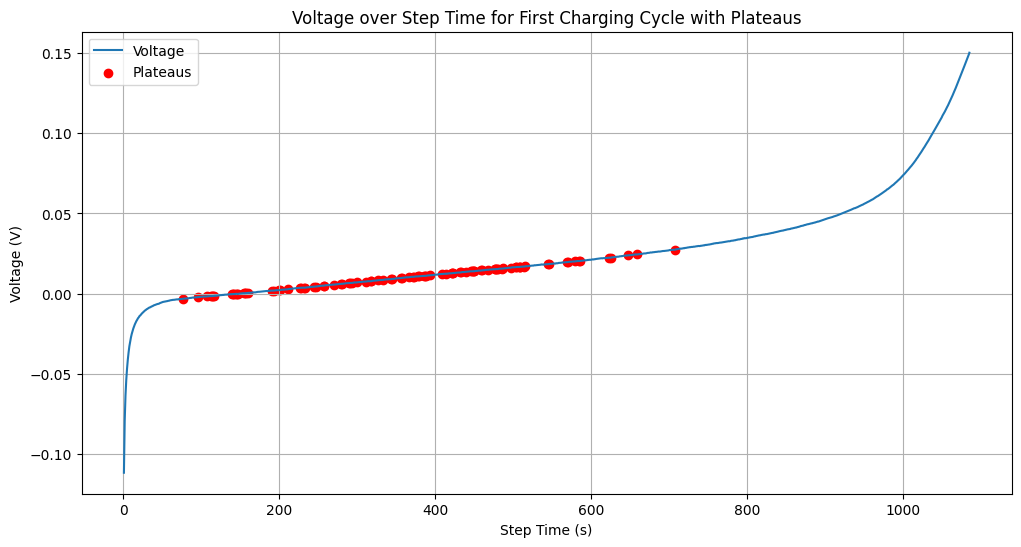

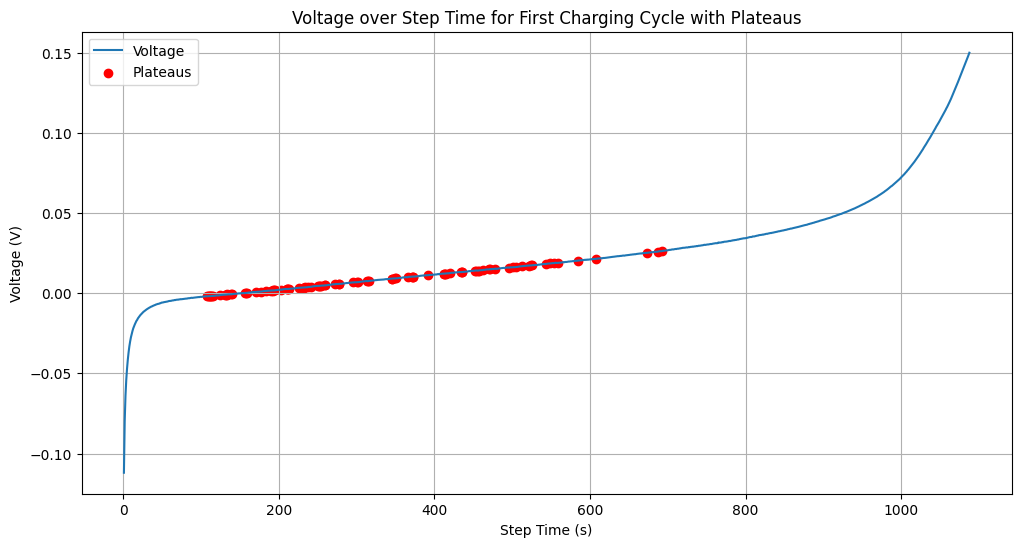

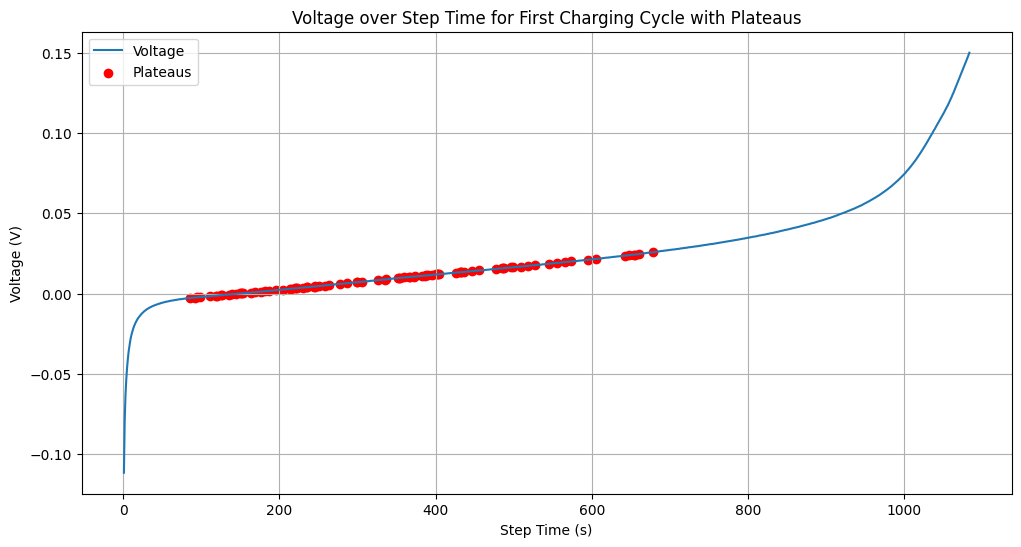

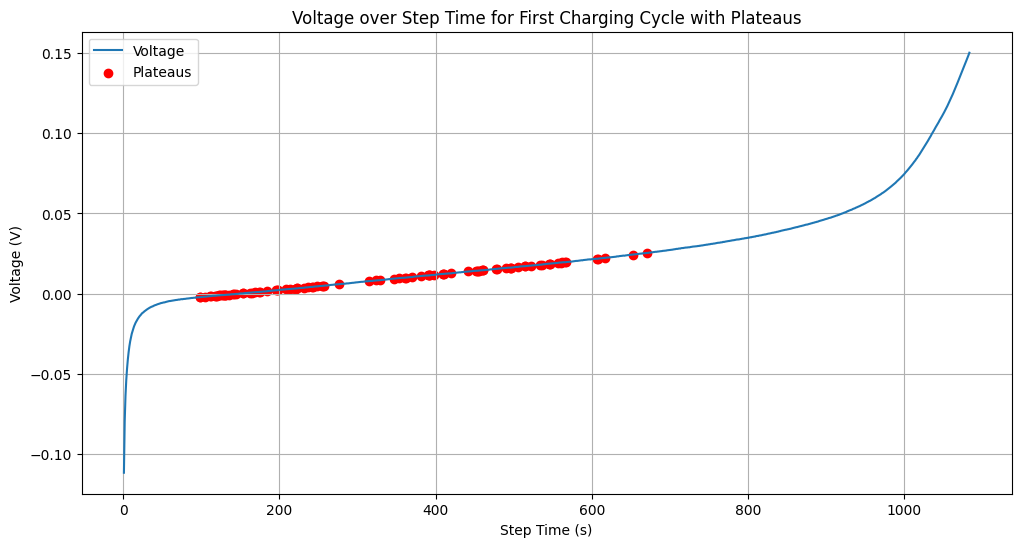

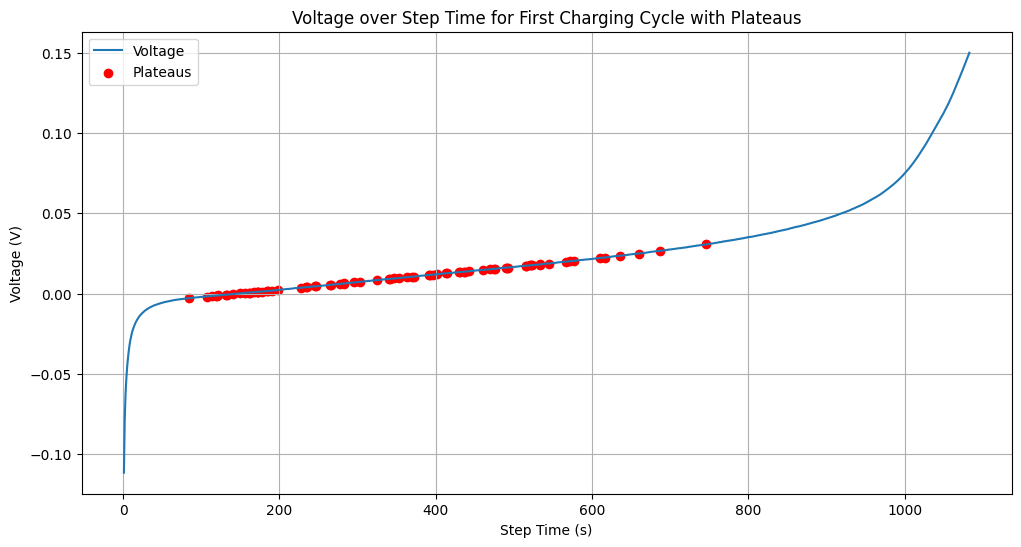

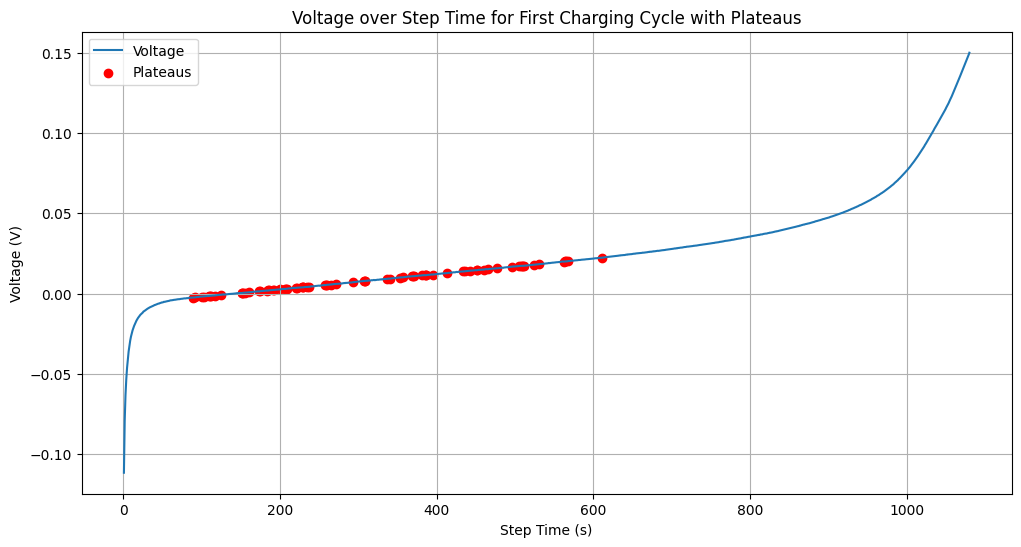

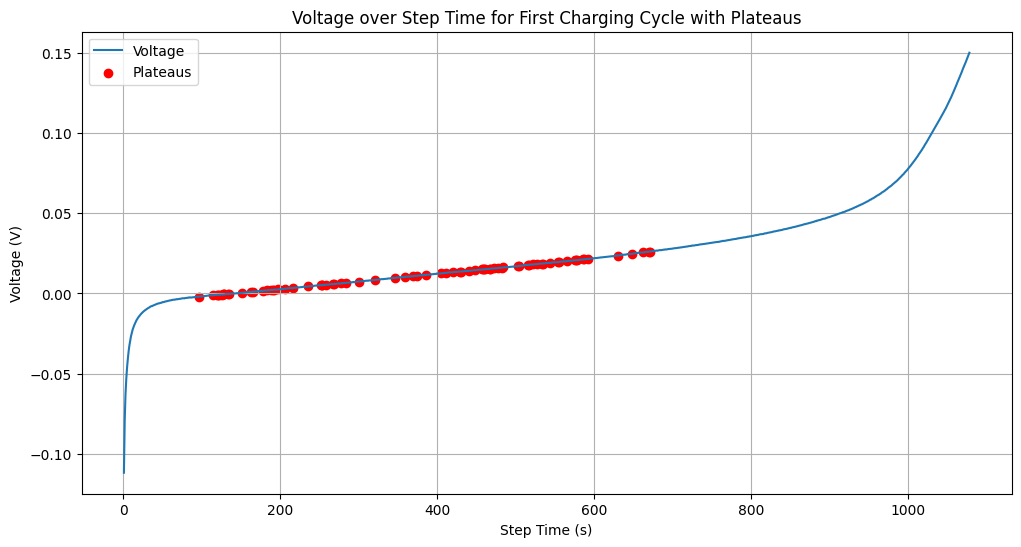

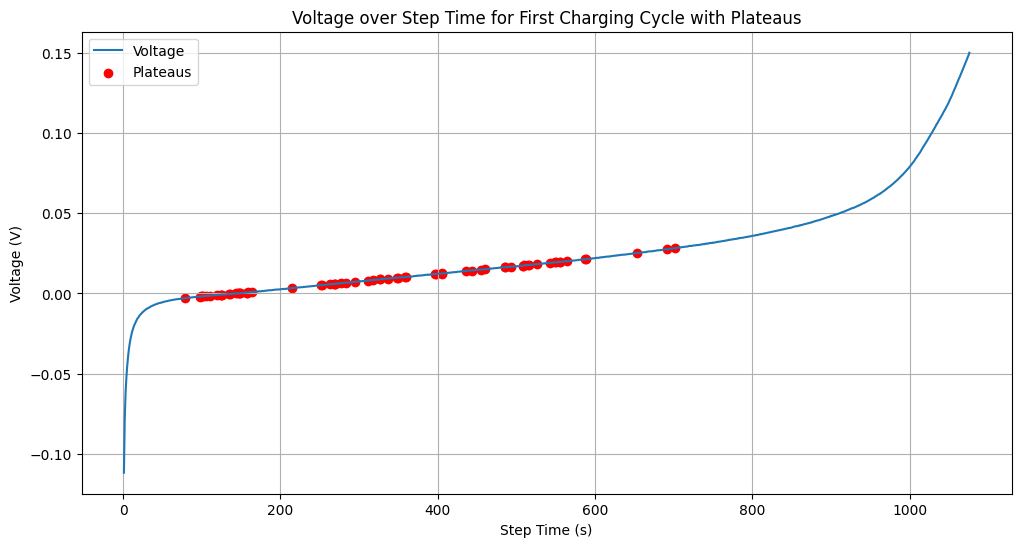

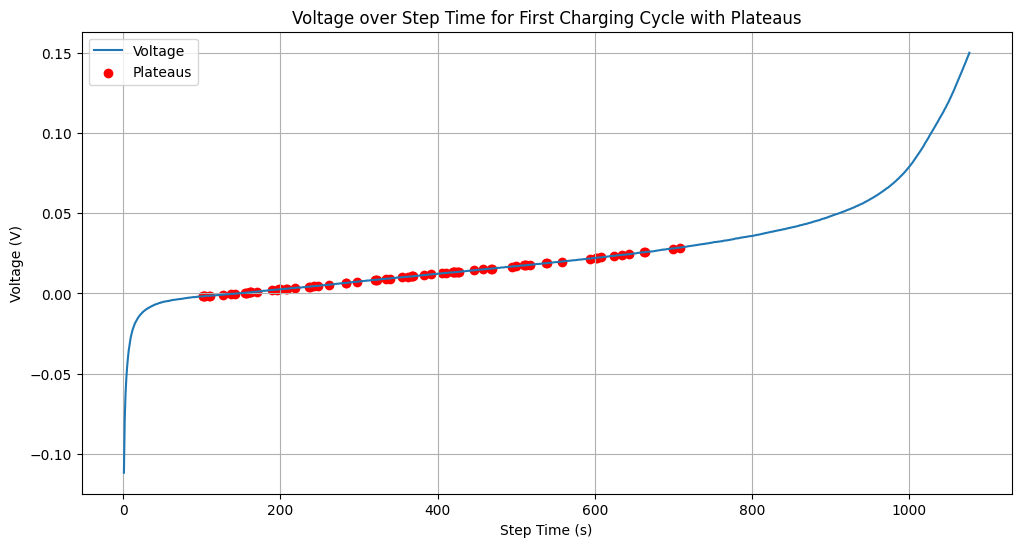

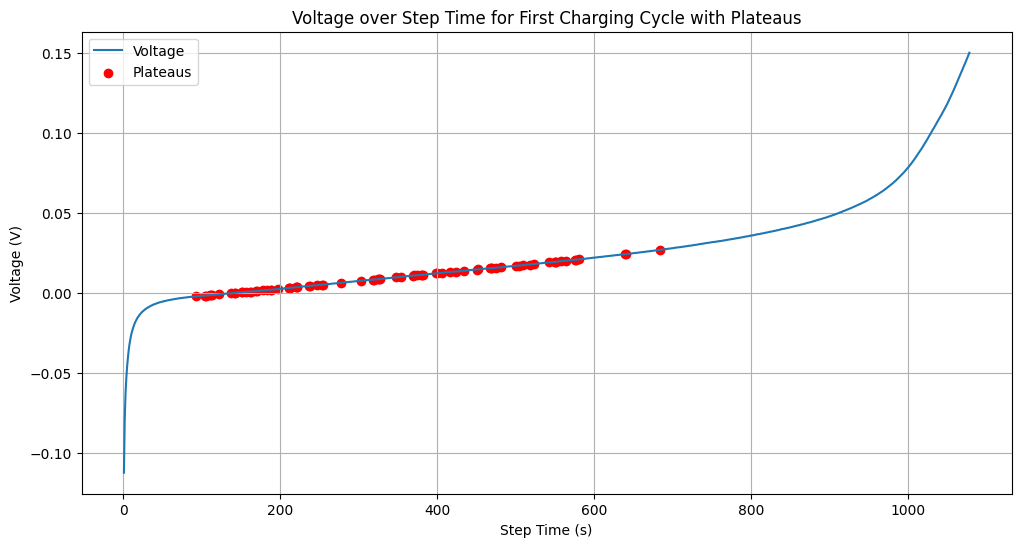

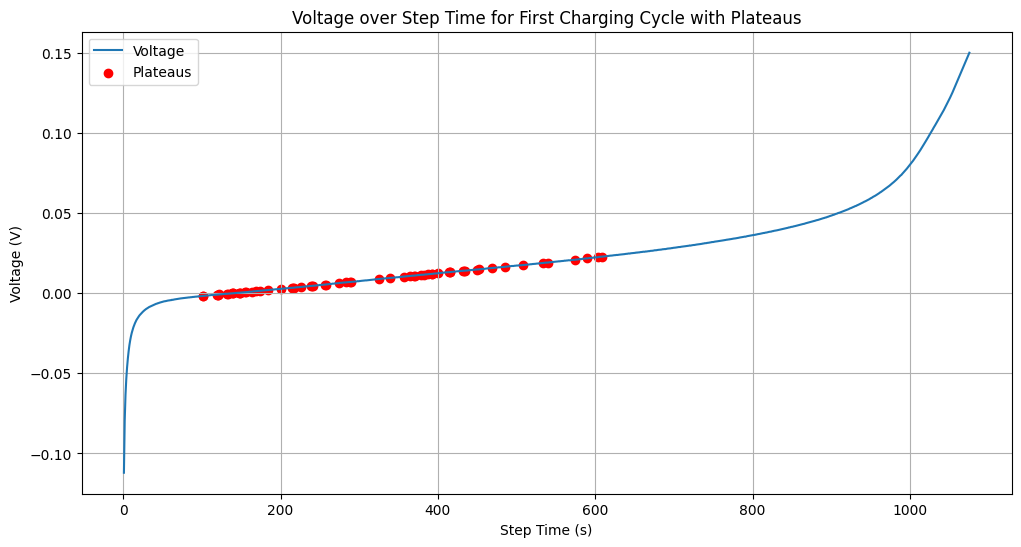

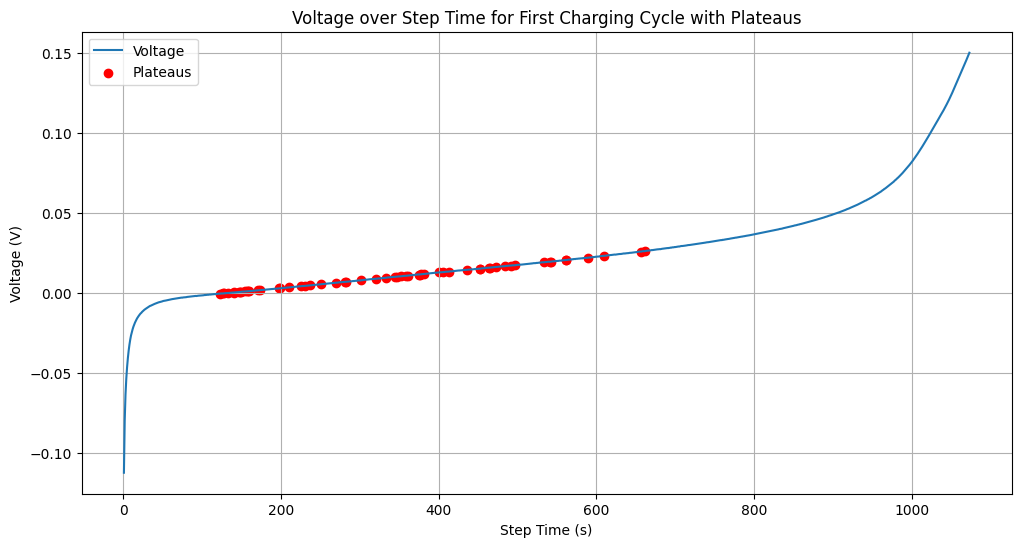

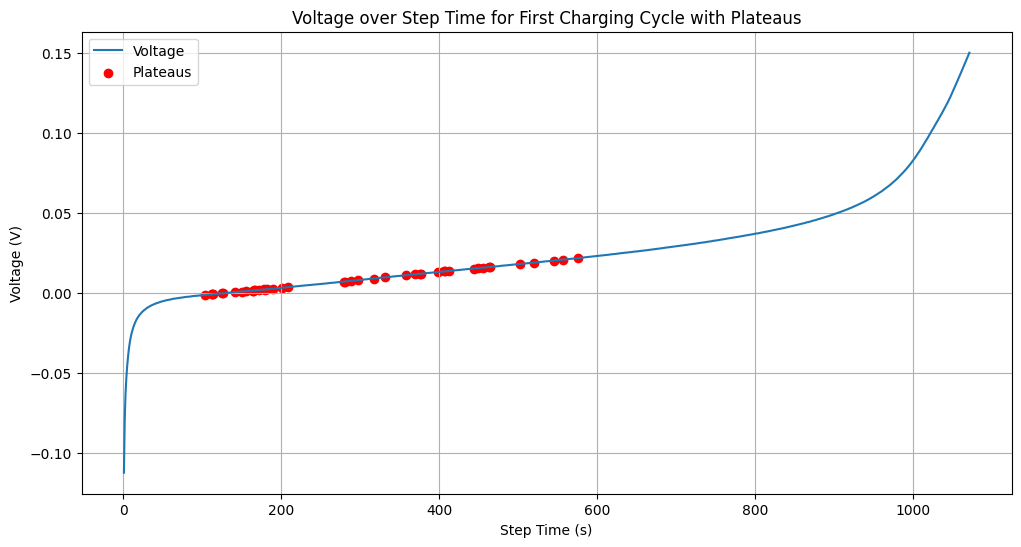

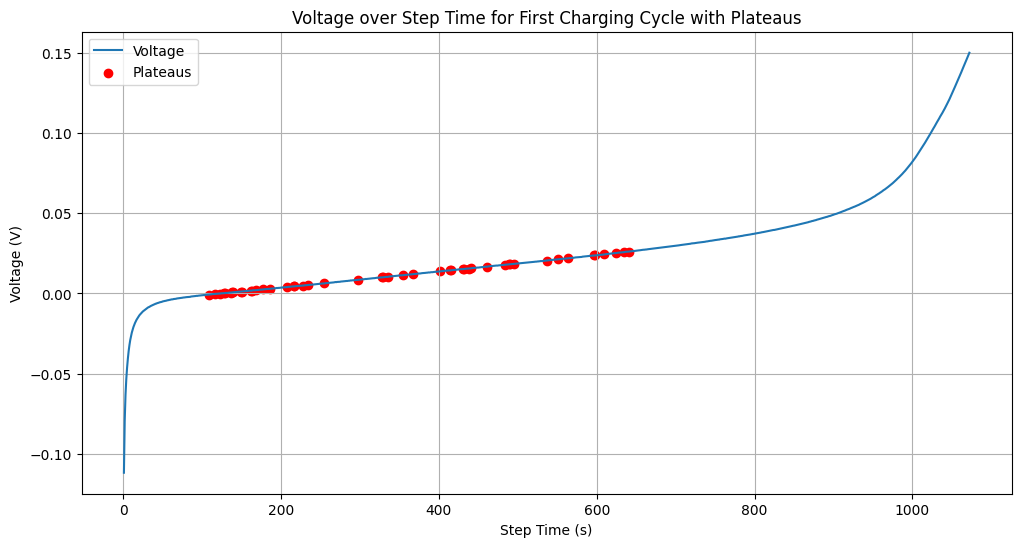

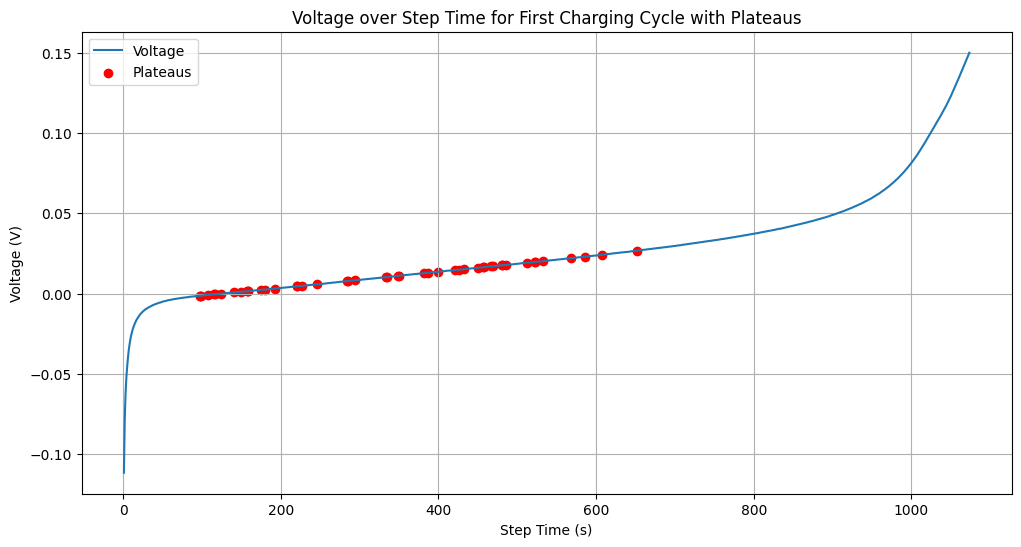

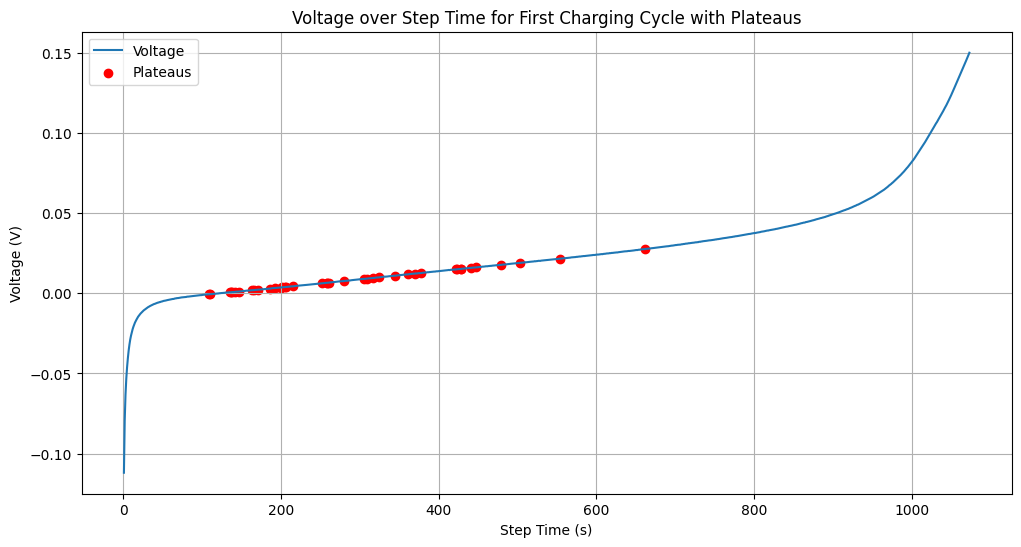

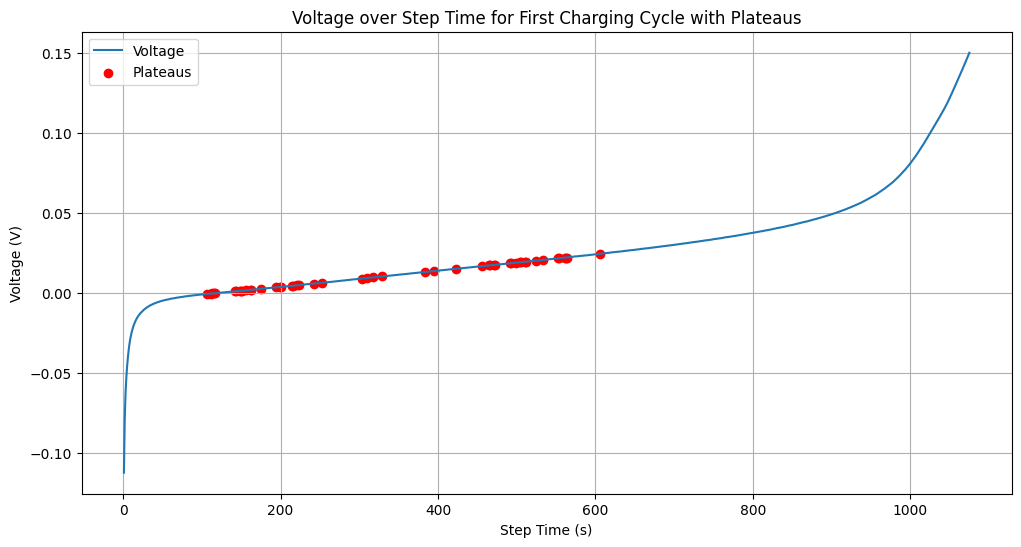

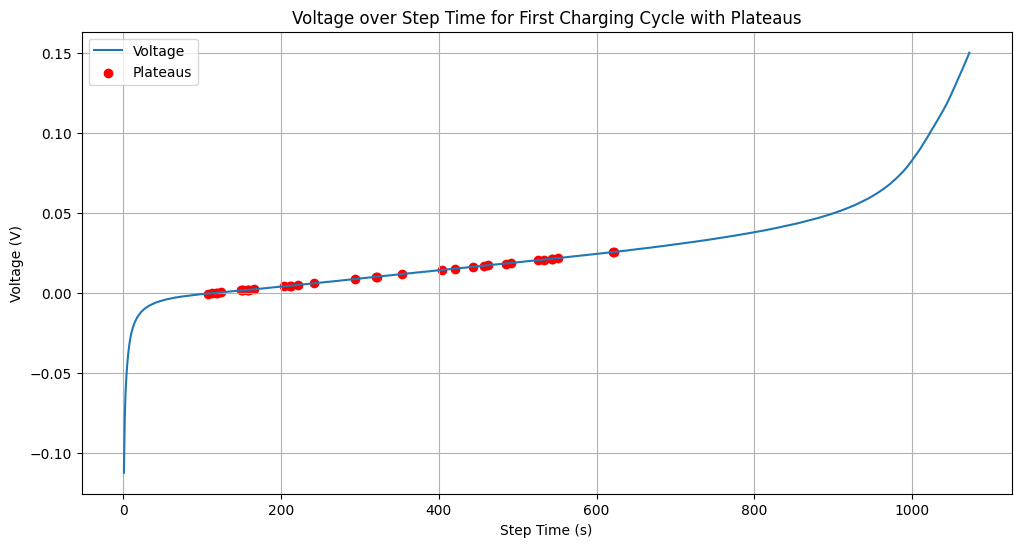

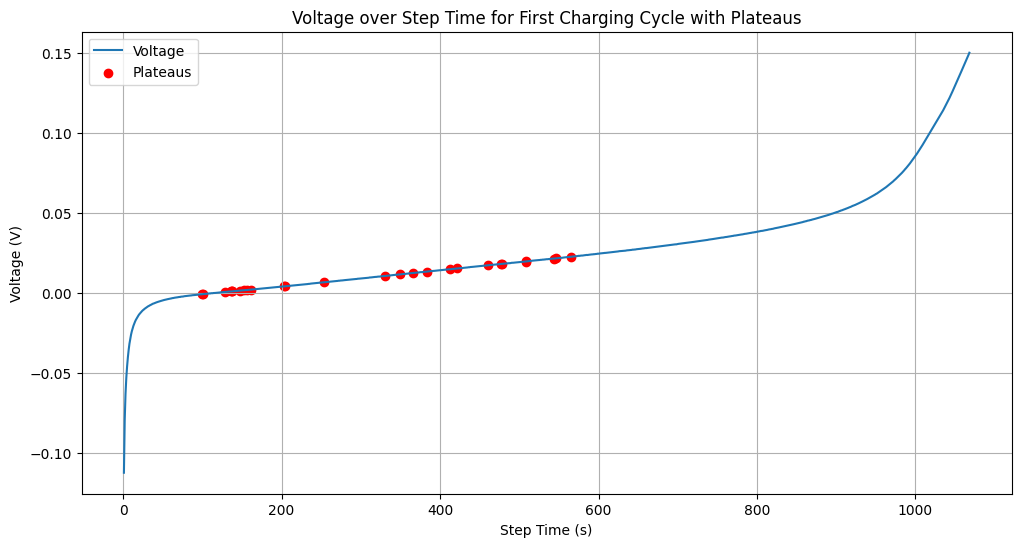

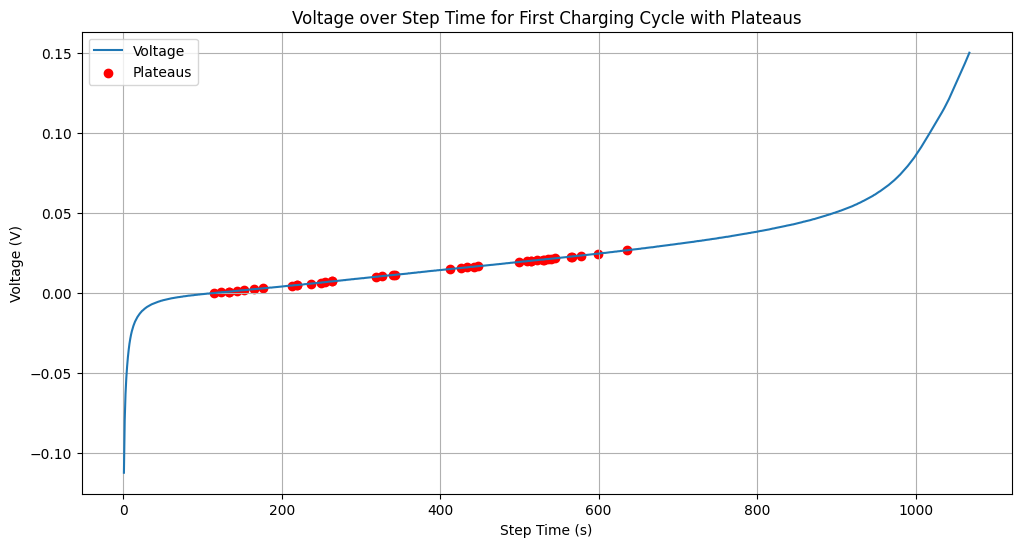

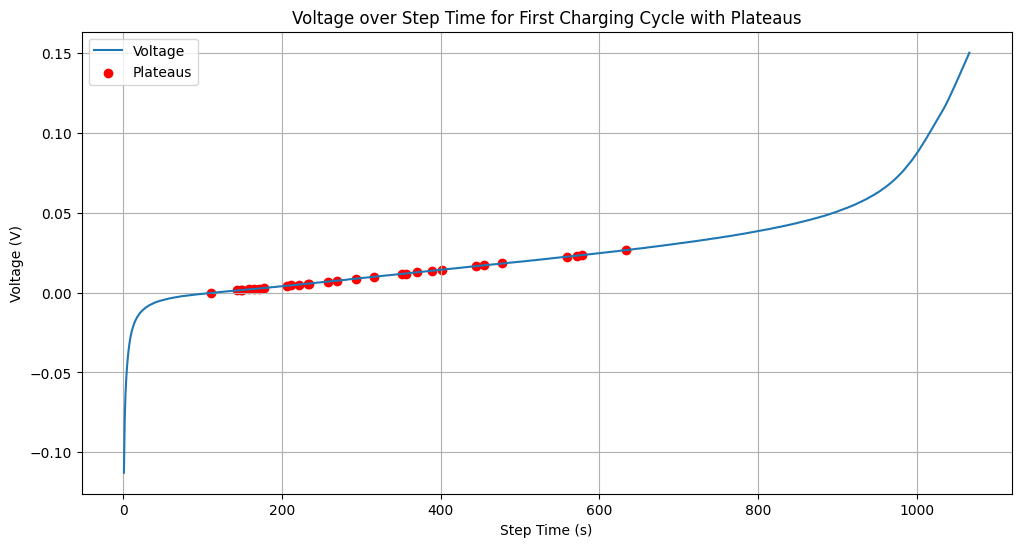

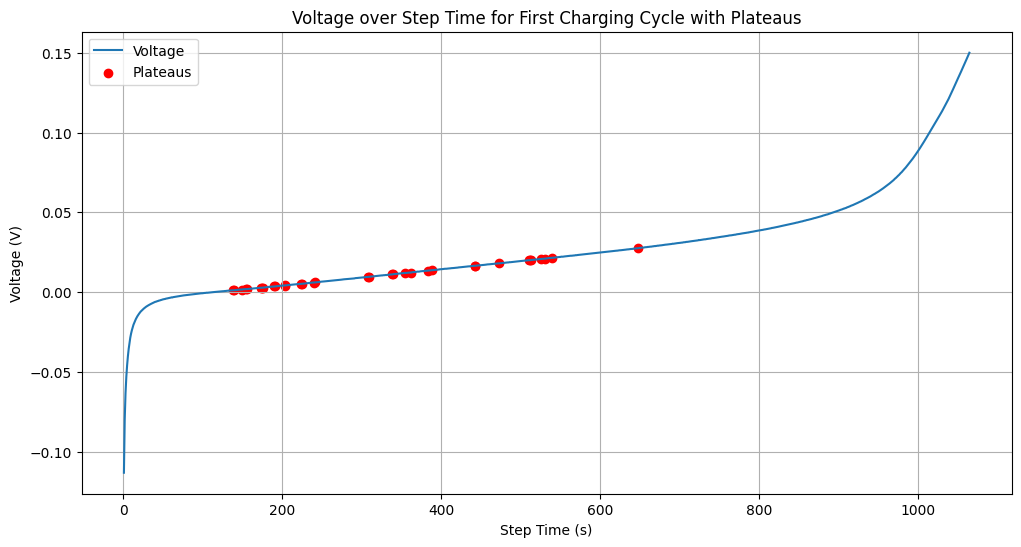

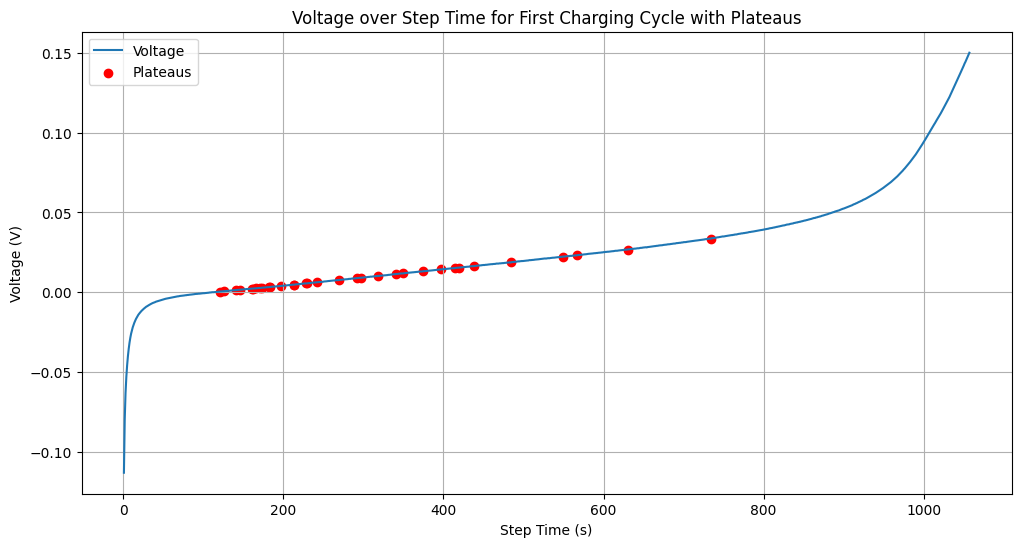

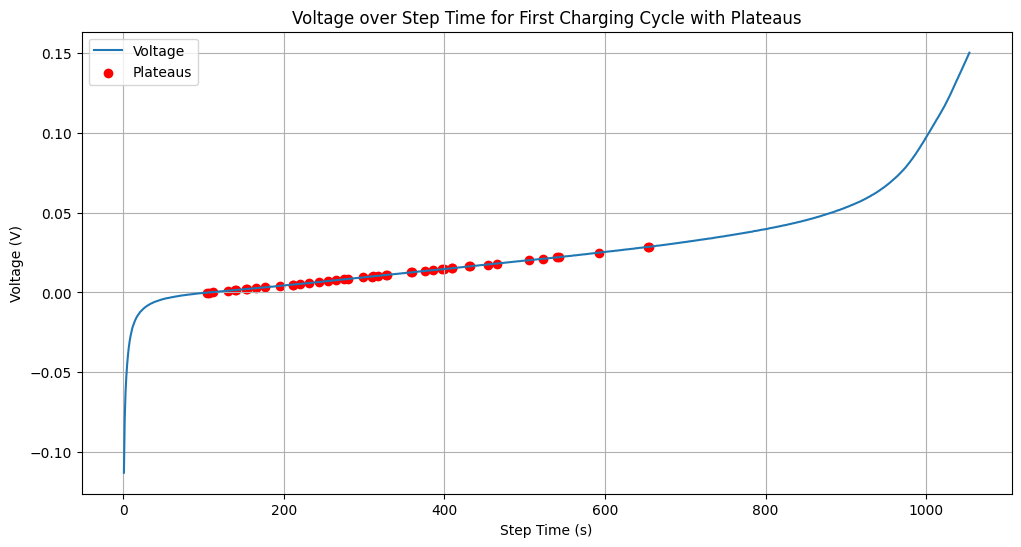

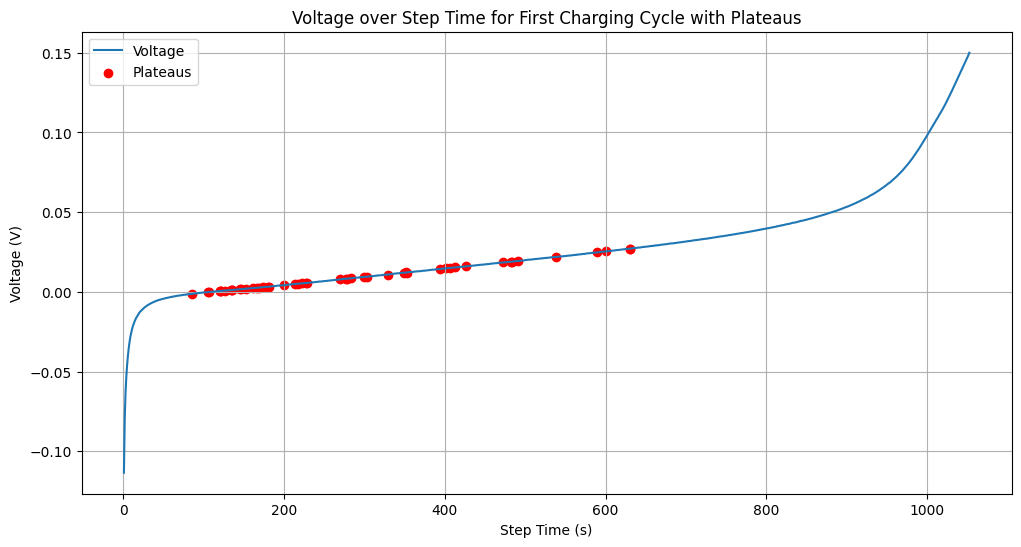

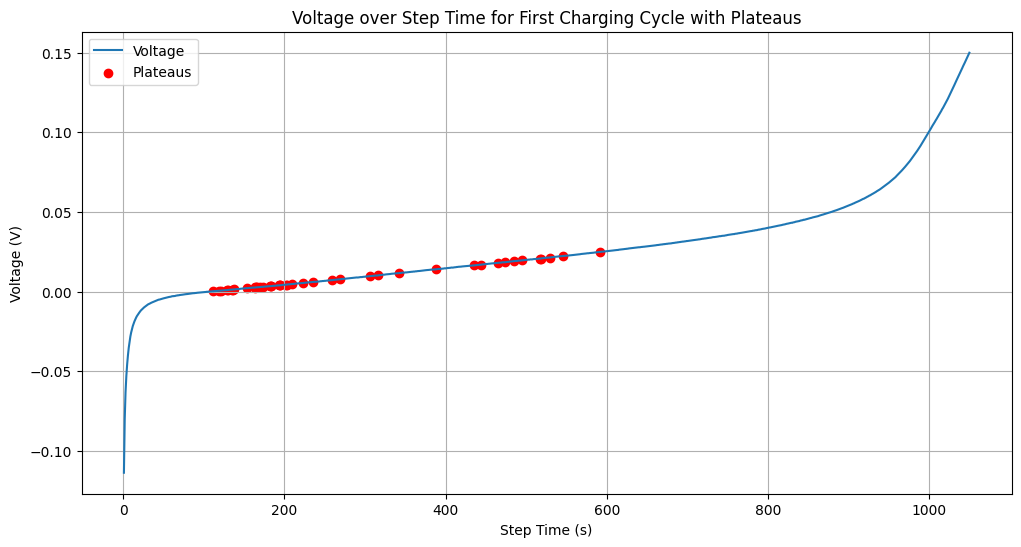

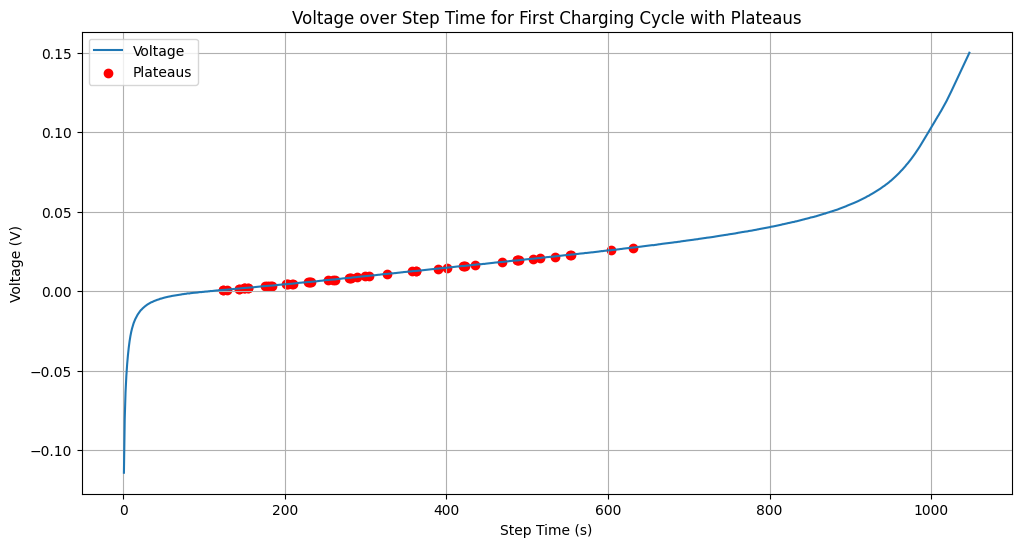

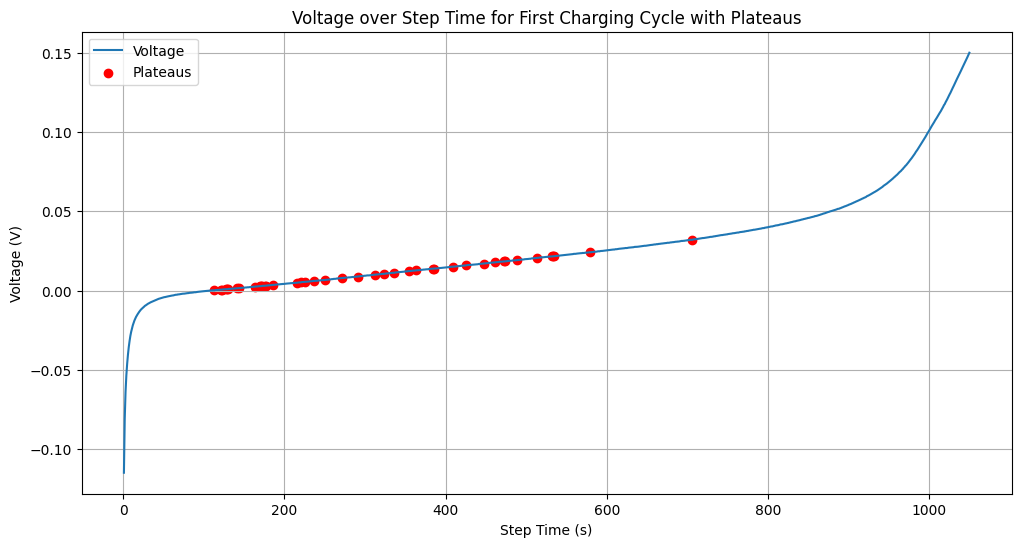

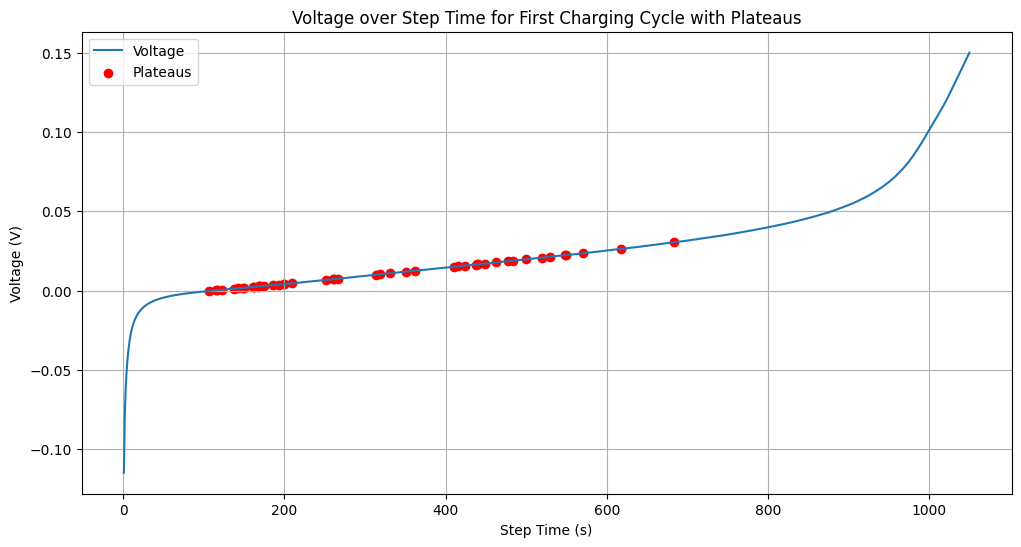

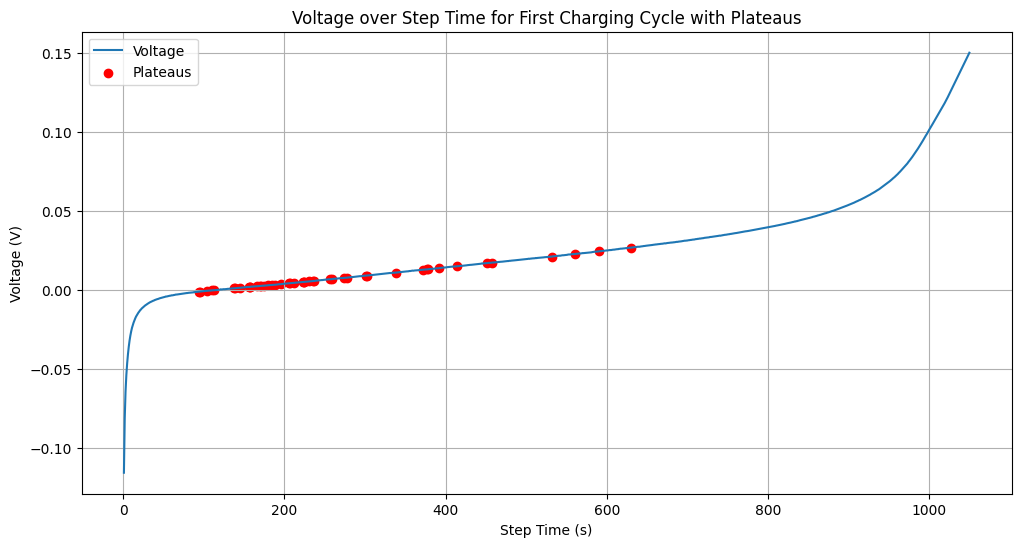

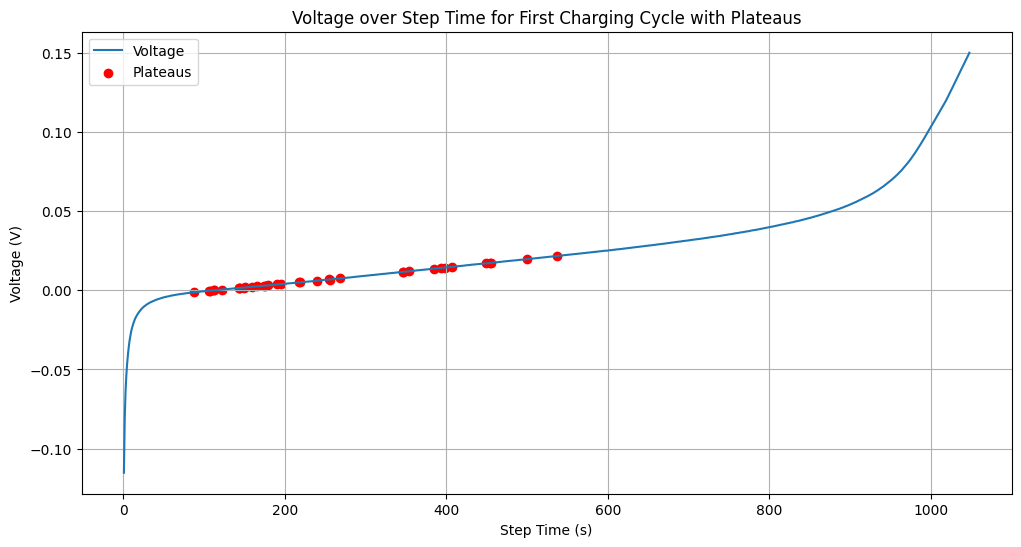

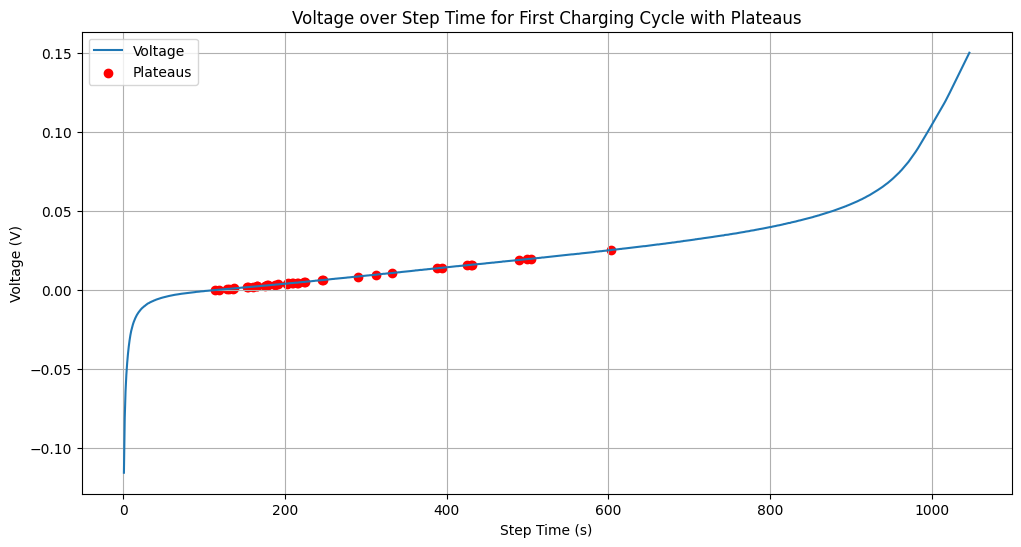

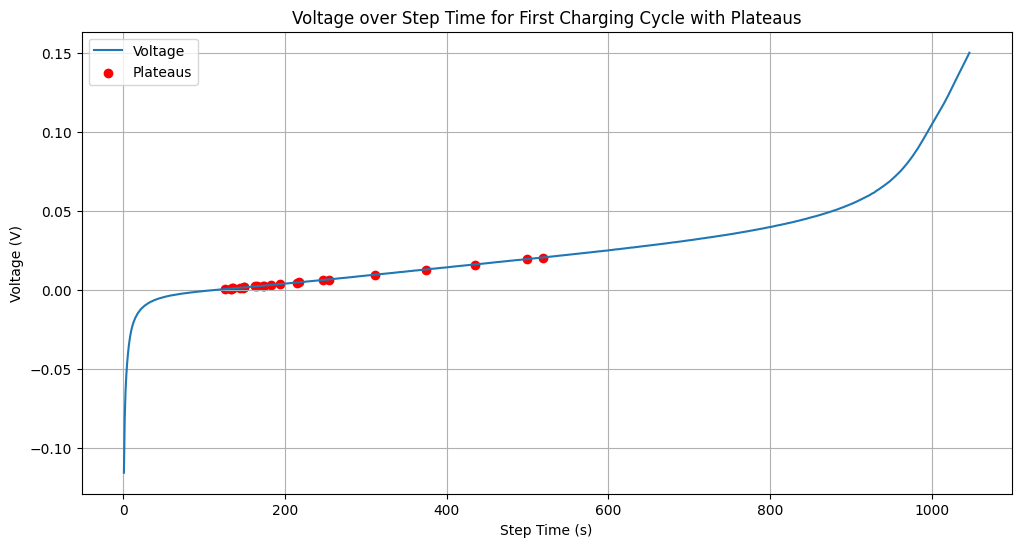

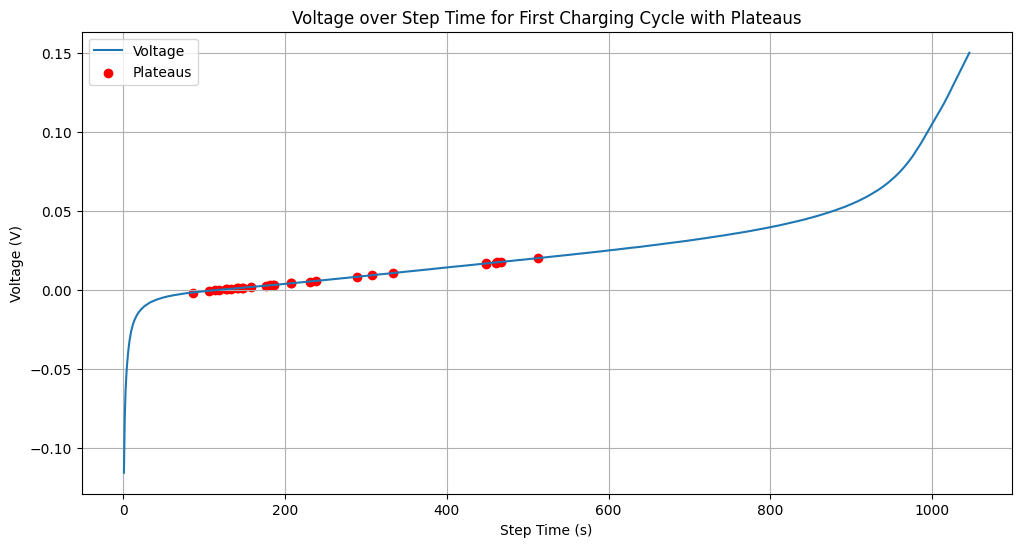

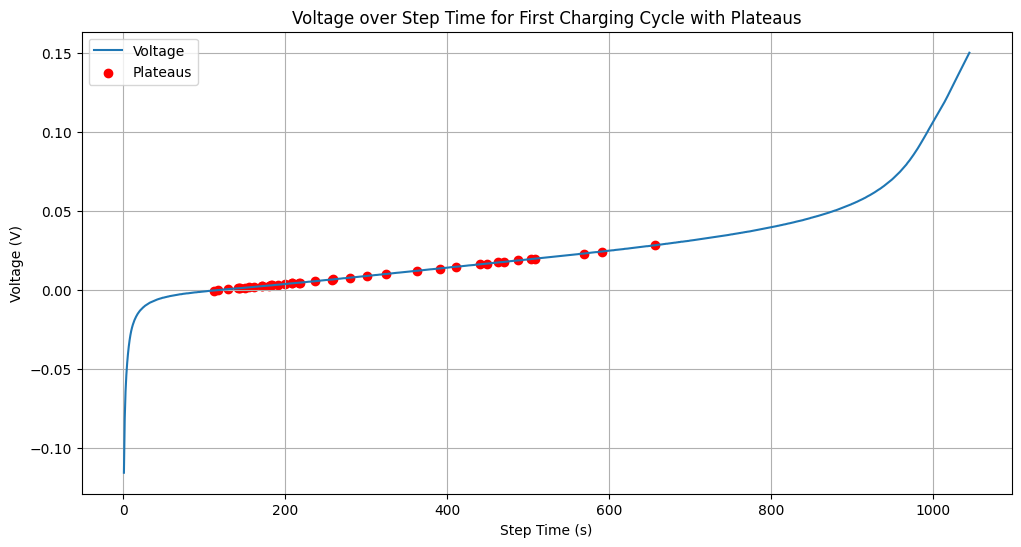

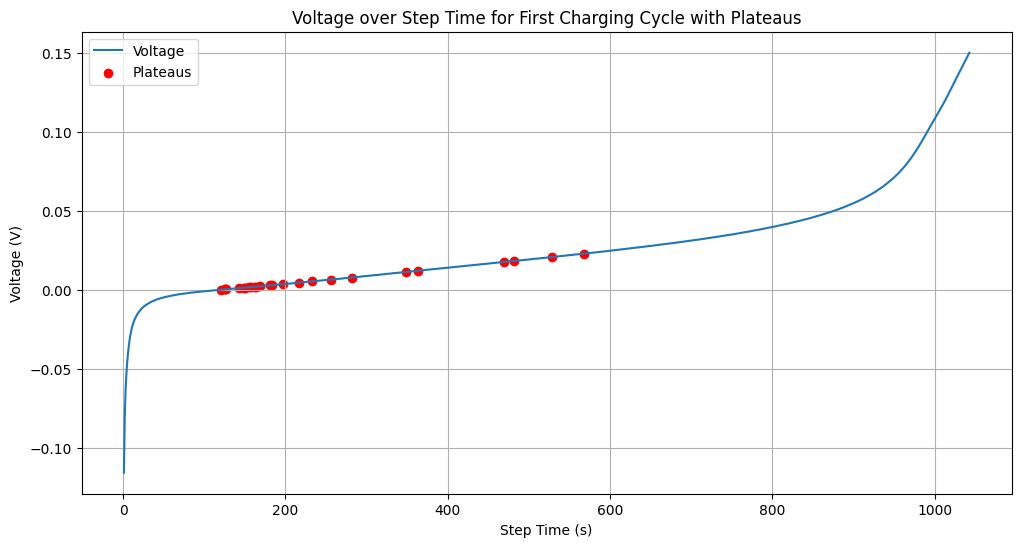

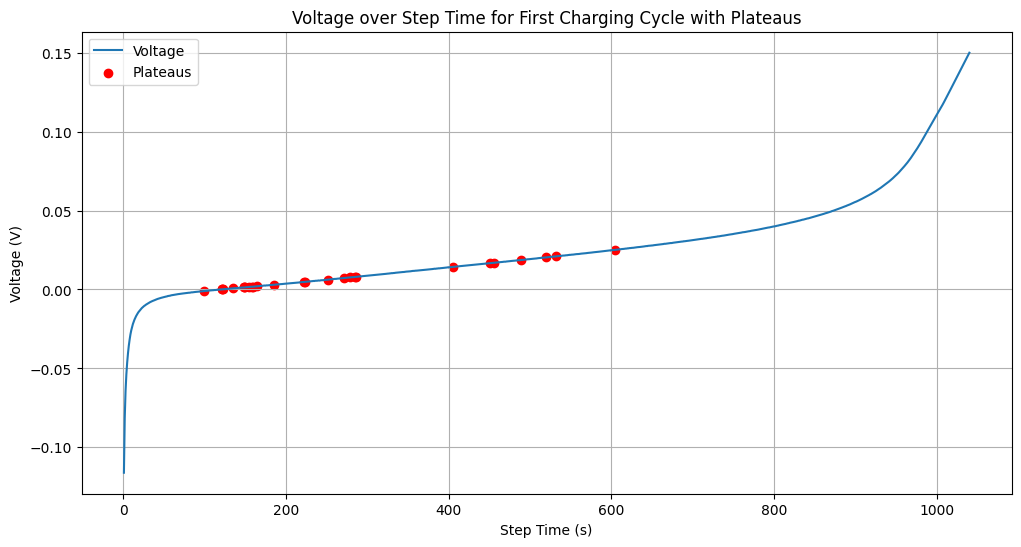

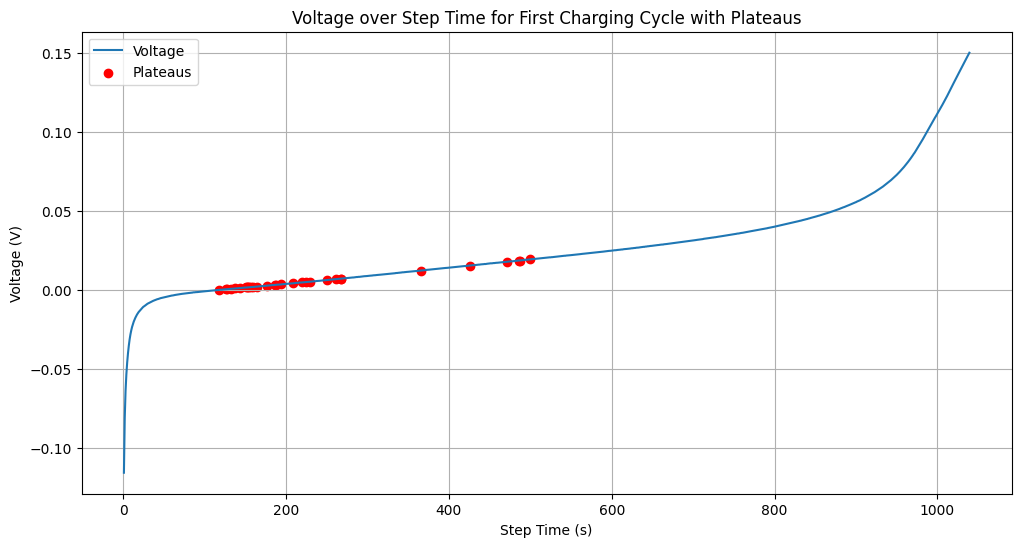

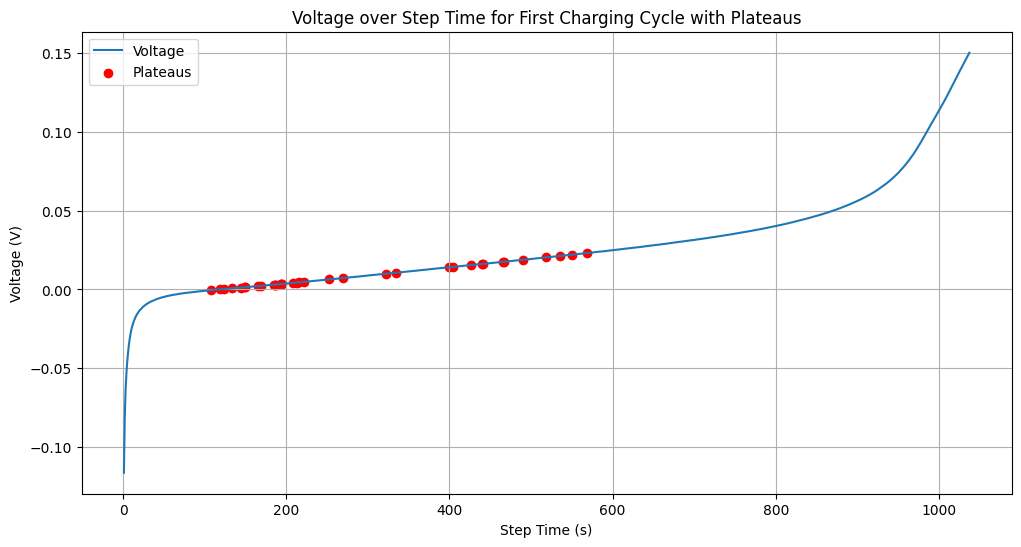

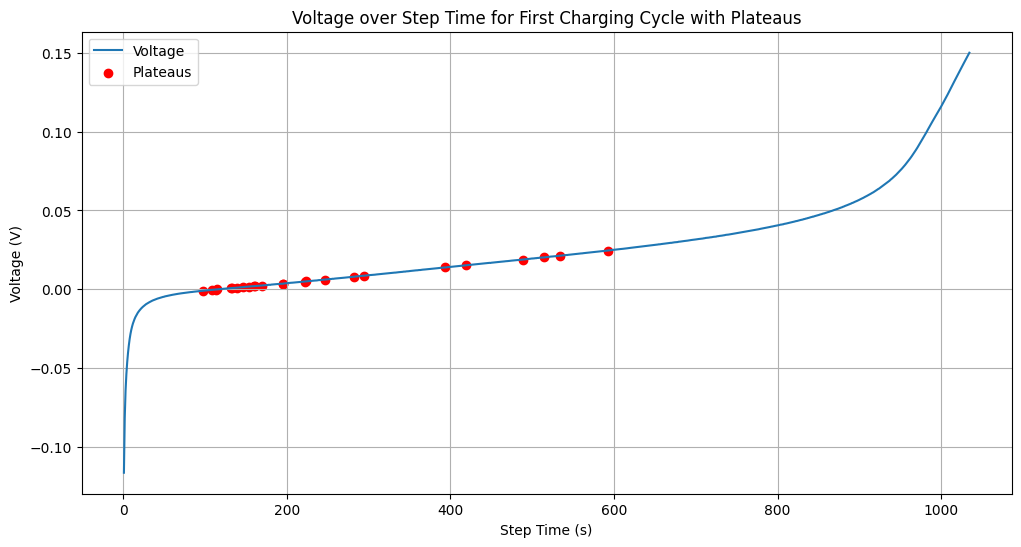

In [61]:
for i in range(1, 100):
    cycle_data = filter_cycle(i)
    # Apply the plateau detection function to the first charging cycle
    cycle_plateaus = detect_plateaus(cycle_data['Voltage(V)'])
    
    # Plotting the voltage over step time for the first charging cycle with identified plateaus
    plt.figure(figsize=(12, 6))
    plt.plot(cycle_data['Step_Time(s)'], cycle_data['Voltage(V)'], label='Voltage')
    plt.scatter(cycle_data['Step_Time(s)'][cycle_plateaus], cycle_data['Voltage(V)'][cycle_plateaus], color='red', label='Plateaus')
    plt.title('Voltage over Step Time for First Charging Cycle with Plateaus')
    plt.xlabel('Step Time (s)')
    plt.ylabel('Voltage (V)')
    plt.legend()
    plt.grid(True)
    plt.show()

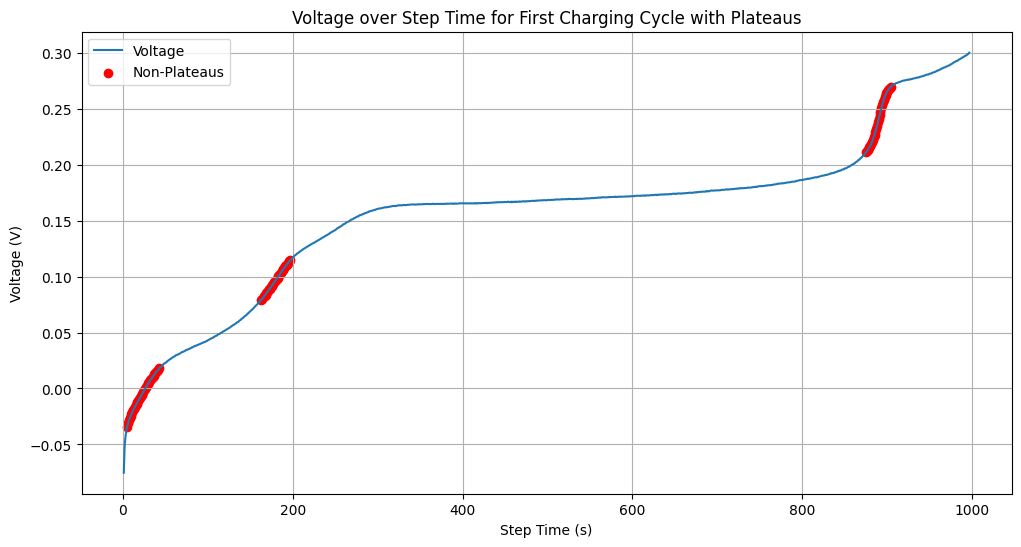

In [36]:
# Function to detect non-plateaus using rolling standard deviation
def detect_non_plateaus(series, window=5, threshold_factor=0.02):
    rolling_std = series.rolling(window=window).std()
    threshold = threshold_factor * series.std()
    non_plateaus = rolling_std >= threshold
    return non_plateaus

# Apply the detect_non_plateaus function to the first charging cycle
charging_cycle_1_non_plateaus = detect_non_plateaus(charging_cycle_1_data['Voltage(V)'])

# Plotting the voltage over step time for the first charging cycle with identified plateaus
plt.figure(figsize=(12, 6))
plt.plot(charging_cycle_1_data['Step_Time(s)'], charging_cycle_1_data['Voltage(V)'], label='Voltage')
plt.scatter(charging_cycle_1_data['Step_Time(s)'][charging_cycle_1_non_plateaus], charging_cycle_1_data['Voltage(V)'][charging_cycle_1_non_plateaus], color='red', label='Non-Plateaus')
plt.title('Voltage over Step Time for First Charging Cycle with Plateaus')
plt.xlabel('Step Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

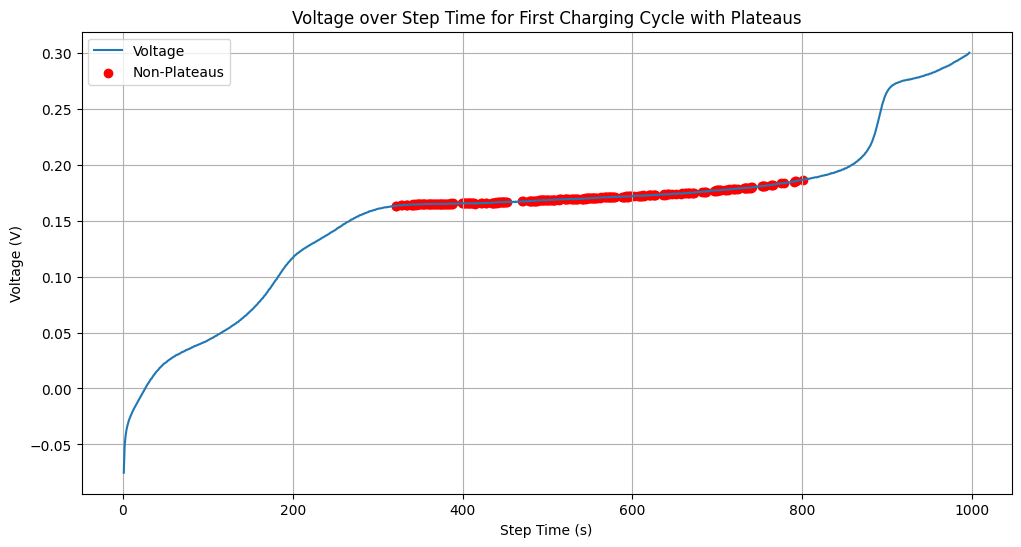